#Extracting lists

In [ ]:
import json
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/OG_dataset/Kolkata.xlsx'
df = pd.read_excel(file_path)

# Function to safely parse JSON strings
def safe_json_loads(val):
    try:
        return json.loads(val)
    except (TypeError, json.JSONDecodeError):
        return {}  # Return an empty dictionary if JSON decoding fails

# Parse the specified columns
columns_to_process = ['new_car_feature','new_car_specs']
for col in columns_to_process:
    df[col] = df[col].apply(safe_json_loads)

# Function to extract nested lists of dictionaries into separate columns
def extract_nested_lists(df, column_name):
    # Initialize a list to hold the extracted nested lists
    extracted_data = []  # Use a list to store extracted rows

    for i, row in df.iterrows():
        # Initialize a dictionary to hold the extracted lists
        extracted_row = {}

        # Iterate over each key in the JSON object
        for key, value in row[column_name].items():
            if isinstance(value, list) and all(isinstance(item, dict) for item in value):
                extracted_row[f"{column_name}_{key}"] = value

        # If there is a 'data' key, handle nested 'list' structures within it
        if 'data' in row[column_name]:
            for j, data in enumerate(row[column_name]['data']):
                if isinstance(data.get('list', None), list):
                    key_name = f"{column_name}_data_{j+1}_list"
                    extracted_row[key_name] = data['list']

        # Append the extracted row to the list
        extracted_data.append(extracted_row)

    # Create a DataFrame from the extracted data
    extracted_df = pd.DataFrame(extracted_data)  # Create DataFrame from the list

    # Combine the original dataframe with the extracted data
    df_expanded = pd.concat([df, extracted_df], axis=1)

    return df_expanded

# Apply the extraction function to each specified column
df_final = df.copy()
for column in columns_to_process:
    df_final = extract_nested_lists(df_final, column)

# Display the first few rows of the expanded dataframe
df_final.head()

# Save the final dataframe to a new Excel file
# df_final.to_excel('Kolkata_extracted_all_columns.xlsx', index=False)

new_car_detail  \
0  {"it": 0, "ft": "Petrol", "bt": "Sedan", "km":...   
1  {"it": 0, "ft": "Petrol", "bt": "Hatchback", "...   
2  {"it": 0, "ft": "Petrol", "bt": "SUV", "km": "...   
3  {"it": 0, "ft": "Petrol", "bt": "Hatchback", "...   
4  {"it": 0, "ft": "Diesel", "bt": "SUV", "km": "...   

                                    new_car_overview  \
0  {"heading": "Car overview", "top": [{"key": "R...   
1  {"heading": "Car overview", "top": [{"key": "R...   
2  {"heading": "Car overview", "top": [{"key": "R...   
3  {"heading": "Car overview", "top": [{"key": "R...   
4  {"heading": "Car overview", "top": [{"key": "R...   

                                     new_car_feature  \
0  {'heading': 'Features', 'top': [{'value': 'Pow...   
1  {'heading': 'Features', 'top': [{'value': 'Pow...   
2  {'heading': 'Features', 'top': [{'value': 'Pow...   
3  {'heading': 'Features', 'top': [{'value': 'Pow...   
4  {'heading': 'Features', 'top': [{'value': 'Pow...   

                                       new_car_specs  \
0  {'heading': 'Specifications', 'top': [{'key': ...   
1  {'heading': 'Specifications', 'top': [{'key': ...   
2  {'heading': 'Specifications', 'top': [{'key': ...   
3  {'heading': 'Specifications', 'top': [{'key': ...   
4  {'heading': 'Specifications', 'top': [{'key': ...   

                                           car_links  \
0  https://www.cardekho.com/used-car-details/used...   
1  https://www.cardekho.com/buy-used-car-details/...   
2  https://www.cardekho.com/used-car-details/used...   
3  https://www.cardekho.com/buy-used-car-details/...   
4  https://www.cardekho.com/used-car-details/used...   

                                 new_car_feature_top  \
0  [{'value': 'Power Steering'}, {'value': 'Power...   
1  [{'value': 'Power Steering'}, {'value': 'Power...   
2  [{'value': 'Power Steering'}, {'value': 'Power...   
3  [{'value': 'Power Steering'}, {'value': 'Power...   
4  [{'value': 'Power Steering'}, {'value': 'Power...   

                                new_car_feature_data  \
0  [{'heading': 'Comfort & Convenience', 'subHead...   
1  [{'heading': 'Comfort & Convenience', 'subHead...   
2  [{'heading': 'Comfort & Convenience', 'subHead...   
3  [{'heading': 'Comfort & Convenience', 'subHead...   
4  [{'heading': 'Comfort & Convenience', 'subHead...   

                         new_car_feature_data_1_list  \
0  [{'value': 'Power Steering'}, {'value': 'Power...   
1  [{'value': 'Power Steering'}, {'value': 'Power...   
2  [{'value': 'Power Steering'}, {'value': 'Power...   
3  [{'value': 'Power Steering'}, {'value': 'Power...   
4  [{'value': 'Power Steering'}, {'value': 'Power...   

                         new_car_feature_data_2_list  \
0  [{'value': 'Air Conditioner'}, {'value': 'Heat...   
1  [{'value': 'Air Conditioner'}, {'value': 'Heat...   
2  [{'value': 'Air Conditioner'}, {'value': 'Heat...   
3  [{'value': 'Air Conditioner'}, {'value': 'Heat...   
4  [{'value': 'Air Conditioner'}, {'value': 'Heat...   

                         new_car_feature_data_3_list  \
0  [{'value': 'Adjustable Head Lights'}, {'value'...   
1  [{'value': 'Adjustable Head Lights'}, {'value'...   
2  [{'value': 'Adjustable Head Lights'}, {'value'...   
3  [{'value': 'Fog Lights Rear'}, {'value': 'Powe...   
4  [{'value': 'Adjustable Head Lights'}, {'value'...   

                         new_car_feature_data_4_list  \
0  [{'value': 'Anti Lock Braking System'}, {'valu...   
1  [{'value': 'Anti Lock Braking System'}, {'valu...   
2  [{'value': 'Anti Lock Braking System'}, {'valu...   
3  [{'value': 'Centeral Locking'}, {'value': 'Pow...   
4  [{'value': 'Anti Lock Braking System'}, {'valu...   

                         new_car_feature_data_5_list  \
0  [{'value': 'Cd Player'}, {'value': 'Dvd Player...   
1  [{'value': 'Radio'}, {'value': 'Speakers Front...   
2  [{'value': 'Radio'}, {'value': 'Speakers Front...   
3  [{'value': 'Cd Player'}, {'value': 'Radio'}, {...   
4  [{'value': 'Cd Player'}, {'value': 'Radio'}, {..

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/Kolkata.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Inspect the data type and structure of the 'new_car_overview' column
# print(df['new_car_overview'].head())
# print(df['new_car_overview'].dtype)

import ast

# Function to convert string representation of dictionary to actual dictionary and extract the 'top' value
def extract_top_value(overview):
    try:
        # Convert string to dictionary if needed
        if isinstance(overview, str):
            overview_dict = ast.literal_eval(overview)
        else:
            overview_dict = overview

        # Extract the 'top' key value
        return overview_dict.get('top', None)
    except (ValueError, SyntaxError):
        return None

# Apply the function to create a new column 'top_value'
df['top_value'] = df['new_car_overview'].apply(extract_top_value)

# Display the updated DataFrame with the new 'top_value' column
print(df[['new_car_overview', 'top_value']].head())

#save it as excel
df.to_excel('Kolkata_top_value.xlsx', index=False)


                                      new_car_detail  \
0  {"it": 0, "ft": "Petrol", "bt": "Sedan", "km":...   
1  {"it": 0, "ft": "Petrol", "bt": "Hatchback", "...   
2  {"it": 0, "ft": "Petrol", "bt": "SUV", "km": "...   
3  {"it": 0, "ft": "Petrol", "bt": "Hatchback", "...   
4  {"it": 0, "ft": "Diesel", "bt": "SUV", "km": "...   

                                    new_car_overview  \
0  {"heading": "Car overview", "top": [{"key": "R...   
1  {"heading": "Car overview", "top": [{"key": "R...   
2  {"heading": "Car overview", "top": [{"key": "R...   
3  {"heading": "Car overview", "top": [{"key": "R...   
4  {"heading": "Car overview", "top": [{"key": "R...   

                                     new_car_feature  \
0  {"heading": "Features", "top": [{"value": "Pow...   
1  {"heading": "Features", "top": [{"value": "Pow...   
2  {"heading": "Features", "top": [{"value": "Pow...   
3  {"heading": "Features", "top": [{"value": "Pow...   
4  {"heading": "Features", "top": [{"value": "

#Extracting features

In [ ]:
import pandas as pd
import json

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/lists/Kolkata_lists.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Function to safely parse JSON, returning None if parsing fails
def safe_json_loads(x):
    try:
        return json.loads(x)
    except (TypeError, ValueError):
        return None

# Function to extract key-value pairs from the JSON objects
def extract_key_value(data, key_name):
    return data.get(key_name, None) if data else None

# List of columns that contain JSON-like data
json_columns = [
    'new_car_detail',
    'new_car_overview_top',
    'new_car_feature_top',
    'new_car_feature_data',
    'new_car_feature_data_1_list',
    'new_car_feature_data_2_list',
    'new_car_feature_data_3_list',
    'new_car_feature_data_4_list',
    'new_car_feature_data_5_list',
    'new_car_specs_top',
    'new_car_specs_data',
    'new_car_specs_data_1_list',
    'new_car_specs_data_2_list',
    'new_car_specs_data_3_list'
    # Add other JSON-like columns if needed
]

# Dictionary to store all extracted data
all_extracted_data = {}

# Iterate over each JSON-like column and extract data
for column in json_columns:
    print(f"Processing column: {column}")

    # Parse the JSON data in the column
    json_data = df[column].apply(safe_json_loads)

    # Extract keys dynamically (first entry assumed to have all possible keys)
    keys = set()
    for entry in json_data:
        if entry and isinstance(entry, list):
            for item in entry:
                if 'key' in item:
                    keys.add(item['key'])

    # Extract data for each key
    for key in keys:
        extracted_series = json_data.apply(lambda x: next((item['value'] for item in x if item.get('key') == key), None) if x else None)
        all_extracted_data[f'{column}_{key}'] = extracted_series

# Convert the dictionary to a DataFrame
extracted_df = pd.DataFrame(all_extracted_data)

# Save the extracted data to a new Excel file
extracted_df.to_excel('Kolkata_extracted_all_data.xlsx', index=False)





Processing column: new_car_detail
Processing column: new_car_overview_top
Processing column: new_car_feature_top
Processing column: new_car_feature_data
Processing column: new_car_feature_data_1_list
Processing column: new_car_feature_data_2_list
Processing column: new_car_feature_data_3_list
Processing column: new_car_feature_data_4_list
Processing column: new_car_feature_data_5_list
Processing column: new_car_specs_top
Processing column: new_car_specs_data
Processing column: new_car_specs_data_1_list
Processing column: new_car_specs_data_2_list
Processing column: new_car_specs_data_3_list


In [ ]:
#display
extracted_df.head()

new_car_overview_top_Engine Displacement new_car_overview_top_Kms Driven  \
0                                  2494 cc                      70,000 Kms   
1                                   799 cc                      23,981 Kms   
2                                   999 cc                       7,100 Kms   
3                                  1197 cc                      71,574 Kms   
4                                  1968 cc                      50,000 Kms   

  new_car_overview_top_Registration Year new_car_overview_top_Ownership  \
0                                   2014                    Third Owner   
1                               Jul 2017                    First Owner   
2                               Nov 2021                    First Owner   
3                               Feb 2012                   Second Owner   
4                                   2014                   Second Owner   

   new_car_overview_top_Year of Manufacture new_car_overview_top_Fuel Type  \
0                                    2014.0                         Petrol   
1                                    2017.0                         Petrol   
2                                    2021.0                         Petrol   
3                                    2011.0                         Petrol   
4                                    2014.0                         Diesel   

  new_car_overview_top_Transmission new_car_overview_top_Insurance Validity  \
0                         Automatic                   Third Party insurance   
1                            Manual                           Comprehensive   
2                         Automatic                           Comprehensive   
3                            Manual                             Third Party   
4                         Automatic                   Third Party insurance   

  new_car_overview_top_Seats new_car_overview_top_RTO  ...  \
0                    5 Seats                     WB02  ...   
1                    5 Seats                     WB24  ...   
2                    5 Seats                     WB06  ...   
3                    5 Seats                     WB06  ...   
4                    5 Seats                     WB02  ...   

  new_car_specs_data_3_list_Steering Type  \
0                                   Power   
1                                   Power   
2                                Electric   
3                                   Power   
4                                   Power   

  new_car_specs_data_3_list_Turning Radius  \
0                               5.5 metres   
1                                     4.7m   
2                                     None   
3                                   5.20 m   
4                               5.9 metres   

  new_car_specs_data_3_list_Cargo Volumn new_car_specs_data_3_list_Gear Box  \
0                                   None                           6 Speed    
1                                    222                            5-Speed   
2                                    405                            5 Speed   
3                                295 Lit                            5 Speed   
4                             460-litres                  7-Speed S-Tronic    

  new_car_specs_data_3_list_Drive Type  \
0                                  FWD   
1                                  2WD   
2                                 None   
3                                  FWD   
4                                  AWD   

  new_car_specs_data_3_list_Rear Brake Type  \
0                                Solid Disc   
1                                      Drum   
2                                      Drum   
3                                      Drum   
4                                      Drum   

  new_car_specs_data_3_list_Alloy Wheel Size  \
0                                         17   
1                                       None   
2                                       None   
3             

In [ ]:
import pandas as pd
import json

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/lists/Jaipur_lists.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Function to safely parse JSON, returning None if parsing fails
def safe_json_loads(x):
    try:
        return json.loads(x)
    except (TypeError, ValueError):
        return None

# Function to extract key-value pairs from the JSON objects
def extract_key_value(data, key_name):
    return data.get(key_name, None) if data else None

# List of columns that contain JSON-like data
json_columns = [
    'new_car_detail',
    'new_car_overview_top',
    'new_car_feature_top',
    'new_car_feature_data',
    'new_car_feature_data_1_list',
    'new_car_feature_data_2_list',
    'new_car_feature_data_3_list',
    'new_car_feature_data_4_list',
    'new_car_feature_data_5_list',
    'new_car_specs_top',
    'new_car_specs_data',
    'new_car_specs_data_1_list',
    'new_car_specs_data_2_list',
    'new_car_specs_data_3_list'
    # Add other JSON-like columns if needed
]

# Dictionary to store all extracted data
all_extracted_data = {}

# Iterate over each JSON-like column and extract data
for column in json_columns:
    print(f"Processing column: {column}")

    # Parse the JSON data in the column
    json_data = df[column].apply(safe_json_loads)

    # Extract keys dynamically (first entry assumed to have all possible keys)
    keys = set()
    for entry in json_data:
        if entry and isinstance(entry, list):
            for item in entry:
                if 'key' in item:
                    keys.add(item['key'])

    # Extract data for each key
    for key in keys:
        extracted_series = json_data.apply(lambda x: next((item['value'] for item in x if item.get('key') == key), None) if x else None)
        all_extracted_data[f'{column}_{key}'] = extracted_series

# Process feature data columns separately if they are lists of dictionaries
feature_data_columns = [
    'new_car_feature_data',
    'new_car_feature_data_1_list',
    'new_car_feature_data_2_list',
    'new_car_feature_data_3_list',
    'new_car_feature_data_4_list',
    'new_car_feature_data_5_list'
]

for column in feature_data_columns:
    print(f"Processing feature data column: {column}")

    # Parse the JSON data in the column
    json_data = df[column].apply(safe_json_loads)

    # Extract keys dynamically
    keys = set()
    for entry in json_data:
        if entry and isinstance(entry, list):
            for item in entry:
                if isinstance(item, dict):
                    keys.update(item.keys())

    # Extract data for each key
    for key in keys:
        extracted_series = json_data.apply(lambda x: next((item[key] for item in x if isinstance(item, dict) and key in item), None) if x else None)
        all_extracted_data[f'{column}_{key}'] = extracted_series

# Convert the dictionary to a DataFrame
extracted_df = pd.DataFrame(all_extracted_data)

# Save the extracted data to a new Excel file
extracted_df.to_excel('Jai.xlsx', index=False)

# print("Data extraction completed and saved to 'Kolkata_extracted_all_data.xlsx'.")


Processing column: new_car_detail
Processing column: new_car_overview_top
Processing column: new_car_feature_top
Processing column: new_car_feature_data
Processing column: new_car_feature_data_1_list
Processing column: new_car_feature_data_2_list
Processing column: new_car_feature_data_3_list
Processing column: new_car_feature_data_4_list
Processing column: new_car_feature_data_5_list
Processing column: new_car_specs_top
Processing column: new_car_specs_data
Processing column: new_car_specs_data_1_list
Processing column: new_car_specs_data_2_list
Processing column: new_car_specs_data_3_list
Processing feature data column: new_car_feature_data
Processing feature data column: new_car_feature_data_1_list
Processing feature data column: new_car_feature_data_2_list
Processing feature data column: new_car_feature_data_3_list
Processing feature data column: new_car_feature_data_4_list
Processing feature data column: new_car_feature_data_5_list


In [ ]:
extracted_df.head()

new_car_overview_top_Fuel Type new_car_overview_top_Engine Displacement  \
0                         Petrol                                  2494 cc   
1                         Petrol                                   799 cc   
2                         Petrol                                   999 cc   
3                         Petrol                                  1197 cc   
4                         Diesel                                  1968 cc   

  new_car_overview_top_Registration Year new_car_overview_top_Kms Driven  \
0                                   2014                      70,000 Kms   
1                               Jul 2017                      23,981 Kms   
2                               Nov 2021                       7,100 Kms   
3                               Feb 2012                      71,574 Kms   
4                                   2014                      50,000 Kms   

  new_car_overview_top_RTO new_car_overview_top_Transmission  \
0                     WB02                         Automatic   
1                     WB24                            Manual   
2                     WB06                         Automatic   
3                     WB06                            Manual   
4                     WB02                         Automatic   

  new_car_overview_top_Ownership  new_car_overview_top_Year of Manufacture  \
0                    Third Owner                                    2014.0   
1                    First Owner                                    2017.0   
2                    First Owner                                    2021.0   
3                   Second Owner                                    2011.0   
4                   Second Owner                                    2014.0   

  new_car_overview_top_Insurance Validity new_car_overview_top_Seats  ...  \
0                   Third Party insurance                    5 Seats  ...   
1                           Comprehensive                    5 Seats  ...   
2                           Comprehensive                    5 Seats  ...   
3                             Third Party                    5 Seats  ...   
4                   Third Party insurance                    5 Seats  ...   

  new_car_specs_data_3_list_Drive Type new_car_specs_data_3_list_Cargo Volumn  \
0                                  FWD                                   None   
1                                  2WD                                    222   
2                                 None                                    405   
3                                  FWD                                295 Lit   
4                                  AWD                             460-litres   

  new_car_feature_data_subHeading  \
0                         Comfort   
1                         Comfort   
2                         Comfort   
3                         Comfort   
4                         Comfort   

                           new_car_feature_data_list  \
0  [{'value': 'Power Steering'}, {'value': 'Power...   
1  [{'value': 'Power Steering'}, {'value': 'Power...   
2  [{'value': 'Power Steering'}, {'value': 'Power...   
3  [{'value': 'Power Steering'}, {'value': 'Power...   
4  [{'value': 'Power Steering'}, {'value': 'Power...   

  new_car_feature_data_heading new_car_feature_data_1_list_value  \
0        Comfort & Convenience                    Power Steering   
1        Comfort & Convenience                    Power Steering   
2        Comfort & Convenience                    Power Steering   
3        Comfort & Convenience                    Power Steering   
4        Comfort & Convenience                    Power Steering   

  new_car_feature_data_2_list_value new_car_feature_data_3_list_value  \
0                   Air Conditioner            Adjustable Head Lights   
1                   Air Conditioner            Adjustable Head Lights   
2                   Air Conditioner            Adjustable Head Lights   
3                

In [ ]:
extracted_df.to_excel('Kol.xlsx', index=False)

In [ ]:
#displaya
extracted_df.head()

new_car_overview_top_Engine Displacement new_car_overview_top_Kms Driven  \
0                                  2494 cc                      70,000 Kms   
1                                   799 cc                      23,981 Kms   
2                                   999 cc                       7,100 Kms   
3                                  1197 cc                      71,574 Kms   
4                                  1968 cc                      50,000 Kms   

  new_car_overview_top_Registration Year new_car_overview_top_Ownership  \
0                                   2014                    Third Owner   
1                               Jul 2017                    First Owner   
2                               Nov 2021                    First Owner   
3                               Feb 2012                   Second Owner   
4                                   2014                   Second Owner   

   new_car_overview_top_Year of Manufacture new_car_overview_top_Fuel Type  \
0                                    2014.0                         Petrol   
1                                    2017.0                         Petrol   
2                                    2021.0                         Petrol   
3                                    2011.0                         Petrol   
4                                    2014.0                         Diesel   

  new_car_overview_top_Transmission new_car_overview_top_Insurance Validity  \
0                         Automatic                   Third Party insurance   
1                            Manual                           Comprehensive   
2                         Automatic                           Comprehensive   
3                            Manual                             Third Party   
4                         Automatic                   Third Party insurance   

  new_car_overview_top_Seats new_car_overview_top_RTO  ...  \
0                    5 Seats                     WB02  ...   
1                    5 Seats                     WB24  ...   
2                    5 Seats                     WB06  ...   
3                    5 Seats                     WB06  ...   
4                    5 Seats                     WB02  ...   

  new_car_specs_data_3_list_Acceleration new_car_specs_data_3_list_Top Speed  \
0                                   None                                None   
1                                   None                                None   
2                                   None                                None   
3                              12.96 Sec                                None   
4                            8.2 Seconds                            212 Kmph   

                           new_car_feature_data_list  \
0  [{'value': 'Power Steering'}, {'value': 'Power...   
1  [{'value': 'Power Steering'}, {'value': 'Power...   
2  [{'value': 'Power Steering'}, {'value': 'Power...   
3  [{'value': 'Power Steering'}, {'value': 'Power...   
4  [{'value': 'Power Steering'}, {'value': 'Power...   

  new_car_feature_data_subHeading new_car_feature_data_heading  \
0                         Comfort        Comfort & Convenience   
1                         Comfort        Comfort & Convenience   
2                         Comfort        Comfort & Convenience   
3                         Comfort        Comfort & Convenience   
4                         Comfort        Comfort & Convenience   

  new_car_feature_data_1_list_value new_car_feature_data_2_list_value  \
0                    Power Steering                   Air Conditioner   
1                    Power Steering                   Air Conditioner   
2                    Power Steering                   Air Conditioner   
3                    Power Steering                   Air Conditioner   
4                    Power Steering                   Air Conditioner   

   new_car_feature_data_3_list_value new_car_feature_data_4_list_value  \
0             Adjustable Head Lights 

In [ ]:
import pandas as pd
import ast

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/lists/Kolkata_lists.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Function to extract specific fields from the 'new_car_detail' dictionary
def extract_fields(json_str):
    try:
        # Safely evaluate the string to a dictionary
        car_data = ast.literal_eval(json_str)

        # Extract the required fields into a dictionary
        extracted_data = {
            'ignition_type': car_data.get('it'),
            'fuel_type': car_data.get('ft'),
            'body_type': car_data.get('bt'),
            'kilometers_driven': car_data.get('km'),
            'transmission_type': car_data.get('transmission'),
            'previous_owners': car_data.get('ownerNo'),
            'ownership_details': car_data.get('owner'),
            'manufacturer': car_data.get('oem'),
            'car_model': car_data.get('model'),
            'manufacture_year': car_data.get('modelYear'),
            'variant_id': car_data.get('centralVariantId'),
            'variant_name': car_data.get('variantName'),
            'price': car_data.get('price'),
            'actual_price': car_data.get('priceActual'),
            'price_saving': car_data.get('priceSaving'),
            'fixed_price_details': car_data.get('priceFixedText'),
            'trending_info': car_data.get('trendingText')
        }

        return extracted_data

    except (ValueError, SyntaxError):
        # Return an empty dictionary if parsing fails
        return {}

# Apply the function to the 'new_car_detail' column
df_extracted = df['new_car_detail'].apply(extract_fields)

# Normalize the extracted dictionary into separate columns
df_extracted = pd.json_normalize(df_extracted)

# Combine the extracted columns with the original DataFrame
df_final = pd.concat([df.drop(columns=['new_car_detail']), df_extracted], axis=1)

# Save the result to a new Excel file
df_final.to_excel('Kolkata_first.xlsx', index=False)

# Display the first few rows of the final dataframe
print(df_final.head())


                                           car_links  \
0  https://www.cardekho.com/used-car-details/used...   
1  https://www.cardekho.com/buy-used-car-details/...   
2  https://www.cardekho.com/used-car-details/used...   
3  https://www.cardekho.com/buy-used-car-details/...   
4  https://www.cardekho.com/used-car-details/used...   

                                new_car_overview_top  \
0  [{"key": "Registration Year", "value": "2014",...   
1  [{"key": "Registration Year", "value": "Jul 20...   
2  [{"key": "Registration Year", "value": "Nov 20...   
3  [{"key": "Registration Year", "value": "Feb 20...   
4  [{"key": "Registration Year", "value": "2014",...   

                                 new_car_feature_top  \
0  [{"value": "Power Steering"}, {"value": "Power...   
1  [{"value": "Power Steering"}, {"value": "Power...   
2  [{"value": "Power Steering"}, {"value": "Power...   
3  [{"value": "Power Steering"}, {"value": "Power...   
4  [{"value": "Power Steering"}, {"value": "Po

In [ ]:
import pandas as pd
import ast

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/lists/Kolkata_lists.xlsx'  # Update with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

#convert to csv
df.to_csv('Kolkata.csv', index=False)



In [ ]:
#csv to df
df = pd.read_csv('Kolkata.csv')

In [ ]:
df.head()


#Data Cleaning

In [ ]:
#Combine all six excels to one

import pandas as pd

# List of Excel file paths
excel_files = [
    '/content/drive/MyDrive/CarDekho/lists/Features/Bangalore_Features.xlsx',
    '/content/drive/MyDrive/CarDekho/lists/Features/Chennai_Features.xlsx',
    '/content/drive/MyDrive/CarDekho/lists/Features/Delhi_Features.xlsx',
    '/content/drive/MyDrive/CarDekho/lists/Features/Hyderabad_Features.xlsx',
    '/content/drive/MyDrive/CarDekho/lists/Features/Jaipur_Features.xlsx',
    '/content/drive/MyDrive/CarDekho/lists/Features/Kolkata_Features.xlsx'
]

# Initialize an empty list to store DataFrames
dfs = []

# Read each Excel file into a DataFrame and append it to the list
for file in excel_files:
    df = pd.read_excel(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to a new Excel file
combined_df.to_excel('Cars.xlsx', index=False)

print("All six Excel files have been combined into 'combined_car_data.xlsx'")


All six Excel files have been combined into 'combined_car_data.xlsx'


In [ ]:
import pandas as pd
import re

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/Cars.xlsx'
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name='Sheet1')

# Function to remove units, commas, and convert to numeric
def clean_numeric(column):
    return pd.to_numeric(column.replace({',': '', ' kms': '', ' km': '', ' litres': '', 'liters': '', 'bph': '',
                                         'seconds': '', 'metres': '', 'meters': '', 'Lakhs': '', ' L': '',
                                         ' cc': '', ' Nm': '', ' bhp': ''}, regex=True), errors='coerce')

# Columns to clean and convert to numeric
columns_to_clean = [
    'kilometersdriven', 'Seats','priceL', 'Mileage_kmpl', 'Torque',
    'MaxPower_', 'Engine', 'Height', 'Length', 'Width',
    'WheelBase', 'Gro Weight', 'TopSpeed', 'Acceleration', 'NosCylinder','Values/Cylinder',
    'FrontTread', 'RearTread', 'KerbWeight', 'CargoVoumn','Doors',
    'TurningRadiu'
]

# Clean and convert columns
for col in columns_to_clean:
    df[col] = clean_numeric(df[col])

# Remove trailing spaces from string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display the cleaned data types
print(df.dtypes)

# Save the cleaned data to a new Excel file
# df.to_excel('Cleaned_Cars_Data.xlsx', index=False)


City                 object
carlinks             object
ignitiontype          int64
fueltype             object
bodytype             object
kilometersdriven      int64
transmissiontype     object
previousowners        int64
manufacturer         object
carmodel             object
manufactureyear       int64
variantid             int64
variantname          object
priceL              float64
Insurance            object
Color                object
Engine              float64
Seats               float64
Mileage_kmpl        float64
Torque              float64
MaxPower_           float64
NosCylinder         float64
SuperCharger         object
EngineType           object
FuelSupplySystem     object
Values/Cylinder     float64
FrontTread          float64
RearTread           float64
KerbWeight          float64
Height              float64
Length              float64
Width               float64
WheelBase           float64
Gro Weight          float64
FrontBrakeType       object
TopSpeed            

In [ ]:
df.to_excel('Cleaned_Cars_Data.xlsx', index=False)

#Handling Missing Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CarDekho/Cleaned_Cars_Data.xlsx'
data = pd.read_excel(file_path)

# Display the cleaned data types
# print(data.dtypes)
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Display the columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Handling missing values for numerical columns
for col in numerical_cols:
    # Fill missing values with the mean
    data[col] = data[col].fillna(data[col].mean())

# Handling missing values for categorical columns
for col in categorical_cols:
    # Fill missing values with the mode
    data[col] = data[col].fillna(data[col].mode()[0])
    # Alternatively, create a new category for missing values
    # data[col] = data[col].fillna('Missing')

# Save the cleaned dataset
# output_path = '/path/to/Cleaned_Cars_Data_Cleaned.xlsx'
# data.to_excel(output_path, index=False)

print("Missing values have been handled and the cleaned dataset has been saved.")


Numerical columns: Index(['IgnitionType', 'KilometersDriven', 'PreviousOwners', 'ManufactureYear',
       'VariantId', 'Price', 'Engine', 'Seats', 'Mileage', 'Torque',
       'MaxPower', 'NosCylinder', 'ValuesPerCylinder', 'FrontTread',
       'RearTread', 'KerbWeight', 'Height', 'Length', 'Width', 'WheelBase',
       'GrossWeight', 'TopSpeed', 'Doors', 'CargoVolume', 'Acceleration',
       'TurningRadius'],
      dtype='object')
Categorical columns: Index(['City', 'CarLinks', 'FuelType', 'BodyType', 'TransmissionType',
       'manufacturer', 'CarModel', 'VariantName', 'Insurance', 'Color',
       'SuperCharger', 'EngineType', 'FuelSupplySystem', 'FrontBrakeType',
       'RearBrakeType', 'SteeringType', 'GearBox', 'DriveType', 'TyreType',
       'AC', 'HeadLights', 'Locking', 'Entertainment'],
      dtype='object')
Missing values have been handled and the cleaned dataset has been saved.


In [ ]:
print(data.dtypes)

City                  object
CarLinks              object
IgnitionType           int64
FuelType              object
BodyType              object
KilometersDriven       int64
TransmissionType      object
PreviousOwners         int64
manufacturer          object
CarModel              object
ManufactureYear        int64
VariantId              int64
VariantName           object
Price                float64
Insurance             object
Color                 object
Engine               float64
Seats                float64
Mileage              float64
Torque               float64
MaxPower             float64
NosCylinder          float64
SuperCharger          object
EngineType            object
FuelSupplySystem      object
ValuesPerCylinder    float64
FrontTread           float64
RearTread            float64
KerbWeight           float64
Height               float64
Length               float64
Width                float64
WheelBase            float64
GrossWeight          float64
FrontBrakeType

In [ ]:
#check for null values
data.isnull()

City  CarLinks  IgnitionType  FuelType  BodyType  KilometersDriven  \
0     False     False         False     False     False             False   
1     False     False         False     False     False             False   
2     False     False         False     False     False             False   
3     False     False         False     False     False             False   
4     False     False         False     False     False             False   
...     ...       ...           ...       ...       ...               ...   
8364  False     False         False     False     False             False   
8365  False     False         False     False     False             False   
8366  False     False         False     False     False             False   
8367  False     False         False     False     False             False   
8368  False     False         False     False     False             False   

      TransmissionType  PreviousOwners  manufacturer  CarModel  ...  GearBox  \
0                False           False         False     False  ...    False   
1                False           False         False     False  ...    False   
2                False           False         False     False  ...    False   
3                False           False         False     False  ...    False   
4                False           False         False     False  ...    False   
...                ...             ...           ...       ...  ...      ...   
8364             False           False         False     False  ...    False   
8365             False           False         False     False  ...    False   
8366             False           False         False     False  ...    False   
8367             False           False         False     False  ...    False   
8368             False           False         False     False  ...    False   

      DriveType  TyreType  CargoVolume  Acceleration  TurningRadius     AC  \
0         False     False        False         False          False  False   
1         False     False        False         False          False  False   
2         False     False        False         False          False  False   
3         False     False        False         False          False  False   
4         False     False        False         False          False  False   
...         ...       ...          ...           ...            ...    ...   
8364      False     False        False         False          False  False   
8365      False     False        False         False          False  False   
8366      False     False        False         False          False  False   
8367      False     False        False         False          False  False   
8368      False     False        False         False          False  False   

      HeadLights  Locking  Entertainment  
0          False    False          False  
1          False    False          False  
2          False    False          False  
3          False    False          False  
4          False    False          False  
...          ...      ...            ...  
8364       False    False          False  
8365       False    False          False  
8366       False    False          False  
8367       False    False          False  
8368       False    False          False  

[8369 rows x 49 columns]

In [ ]:
#print count of null
data.isnull().sum()

City                 0
CarLinks             0
IgnitionType         0
FuelType             0
BodyType             0
KilometersDriven     0
TransmissionType     0
PreviousOwners       0
manufacturer         0
CarModel             0
ManufactureYear      0
VariantId            0
VariantName          0
Price                0
Insurance            0
Color                0
Engine               0
Seats                0
Mileage              0
Torque               0
MaxPower             0
NosCylinder          0
SuperCharger         0
EngineType           0
FuelSupplySystem     0
ValuesPerCylinder    0
FrontTread           0
RearTread            0
KerbWeight           0
Height               0
Length               0
Width                0
WheelBase            0
GrossWeight          0
FrontBrakeType       0
TopSpeed             0
RearBrakeType        0
Doors                0
SteeringType         0
GearBox              0
DriveType            0
TyreType             0
CargoVolume          0
Acceleration         0
TurningRadius        0
AC                   0
HeadLights           0
Locking              0
Entertainment        0
dtype: int64

In [ ]:
# Save the cleaned dataset
data.to_excel('Filled_Cars_Data.xlsx')

#EDA

In [ ]:
!pip install pandas seaborn matplotlib scikit-learn

#EDA1.Checking for Outliers

Outliers detected in KilometersDriven:
 count    4.800000e+01
mean     3.829245e+05
std      8.216509e+05
min      1.560390e+05
25%      1.635122e+05
50%      1.766755e+05
75%      2.087755e+05
max      5.500000e+06
Name: KilometersDriven, dtype: float64 

Outliers detected in PreviousOwners:
 count    99.000000
mean      4.191919
std       0.395814
min       4.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: PreviousOwners, dtype: float64 

Outliers detected in ManufactureYear:
 count     132.000000
mean     2003.643939
std         3.292677
min      1985.000000
25%      2003.000000
50%      2004.000000
75%      2006.000000
max      2006.000000
Name: ManufactureYear, dtype: float64 

Outliers detected in Price:
 count    858.000000
mean      34.309114
std       16.746822
min       17.790000
25%       21.425000
50%       28.000000
75%       42.000000
max       96.000000
Name: Price, dtype: float64 

Outliers detected in Engine:
 count    1527.0000

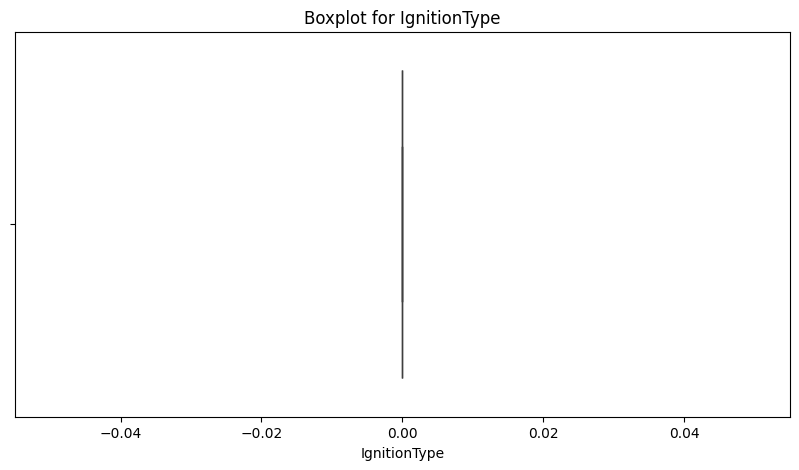

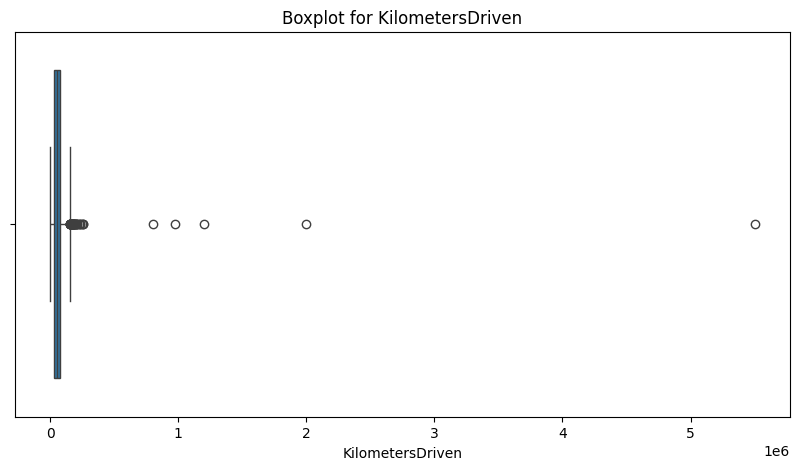

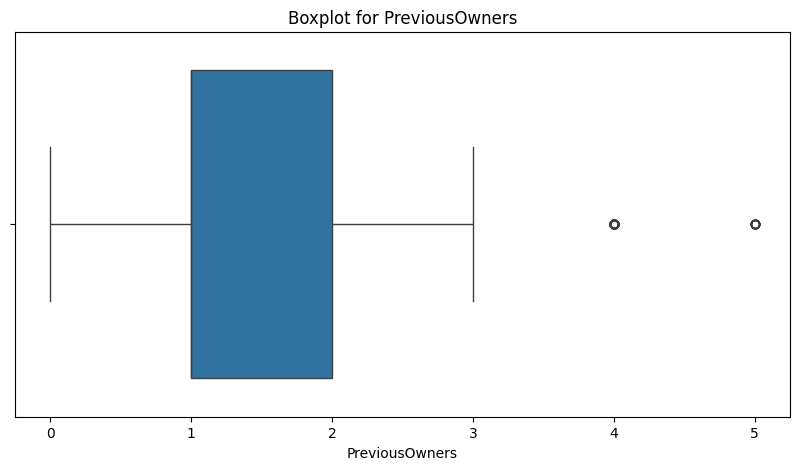

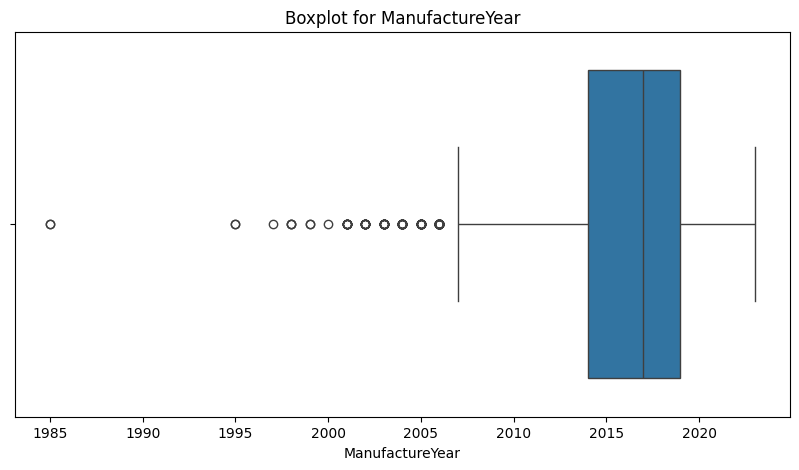

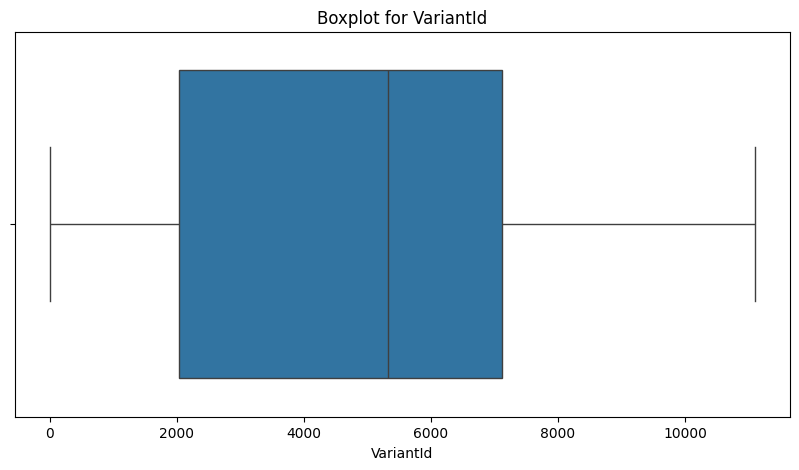

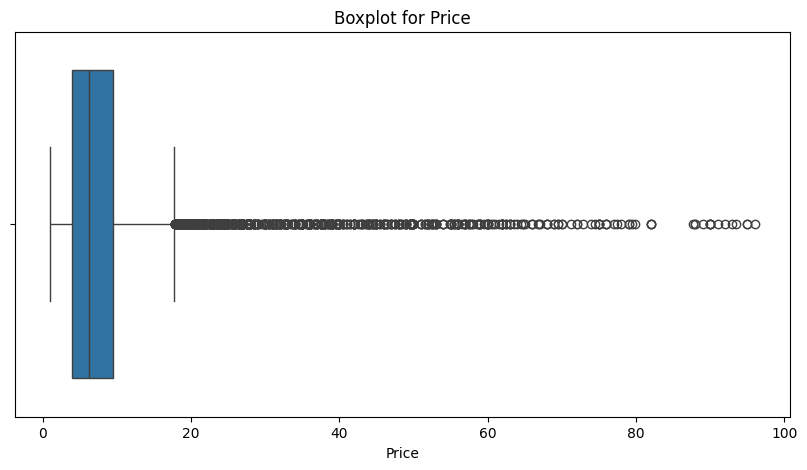

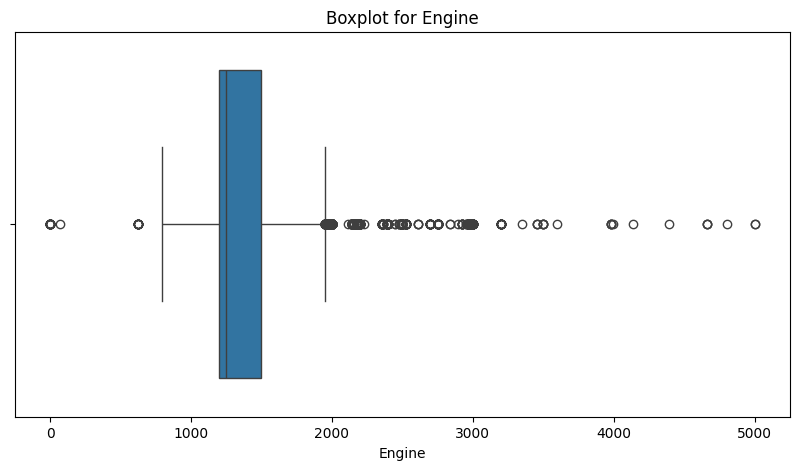

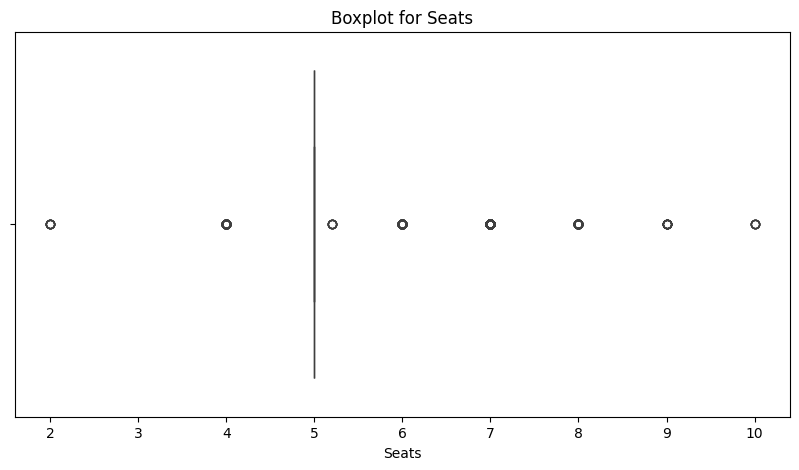

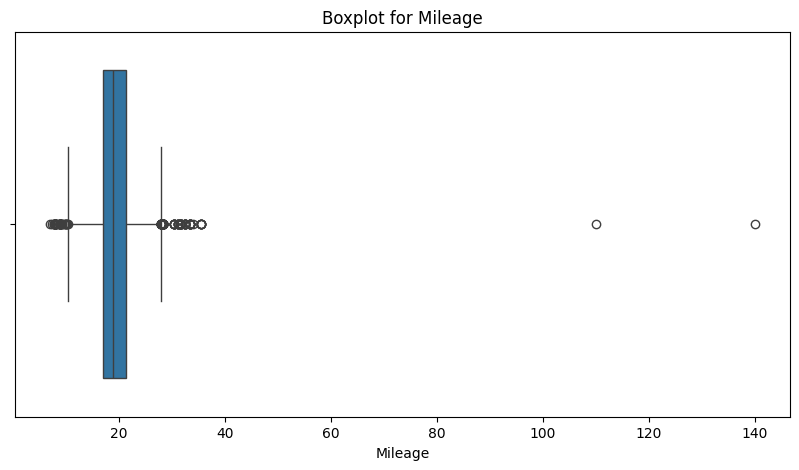

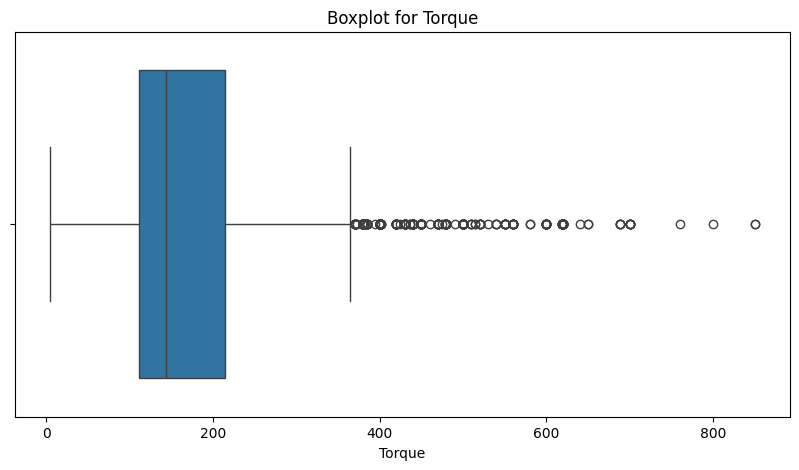

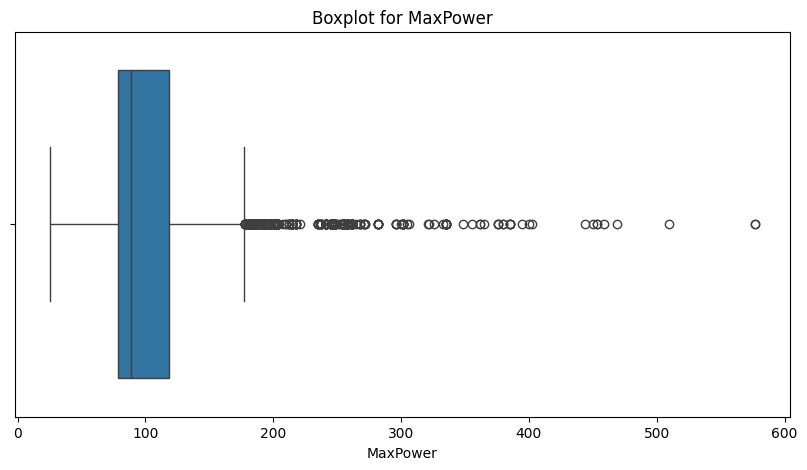

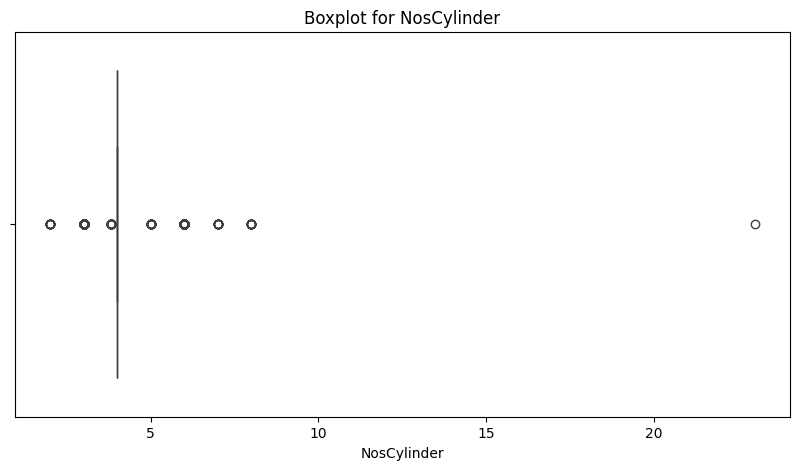

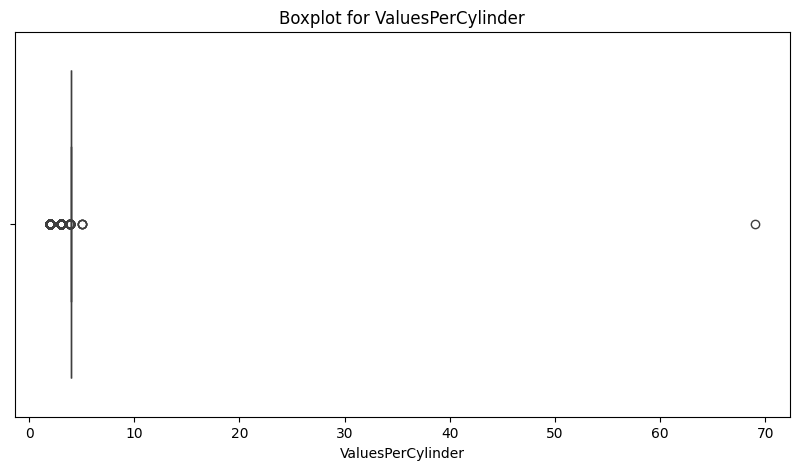

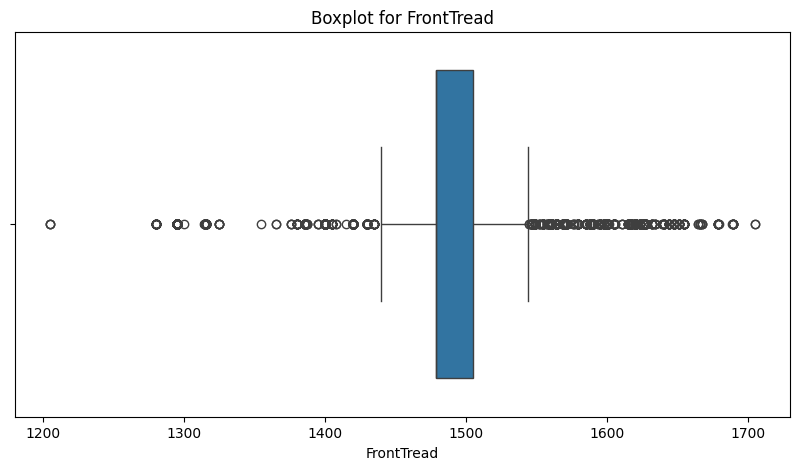

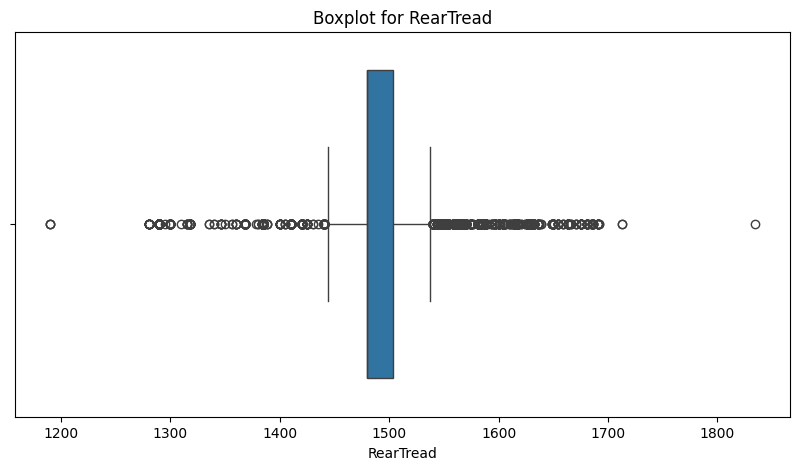

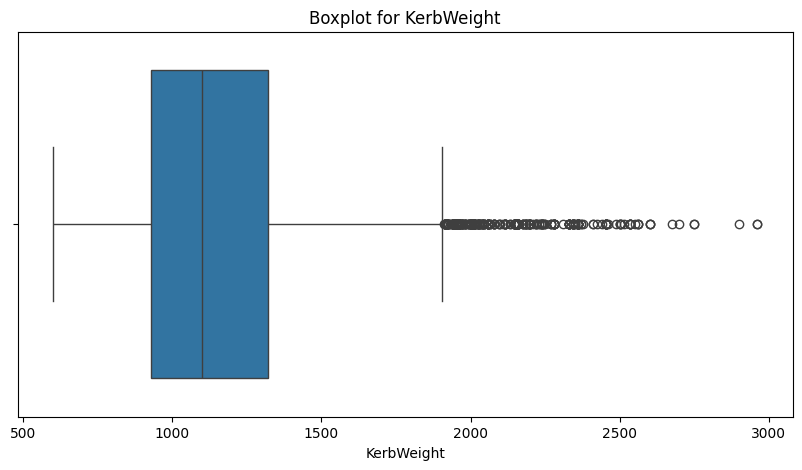

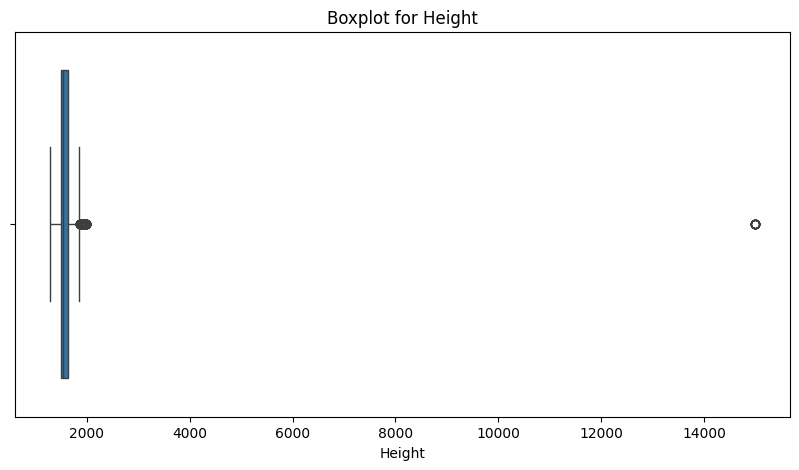

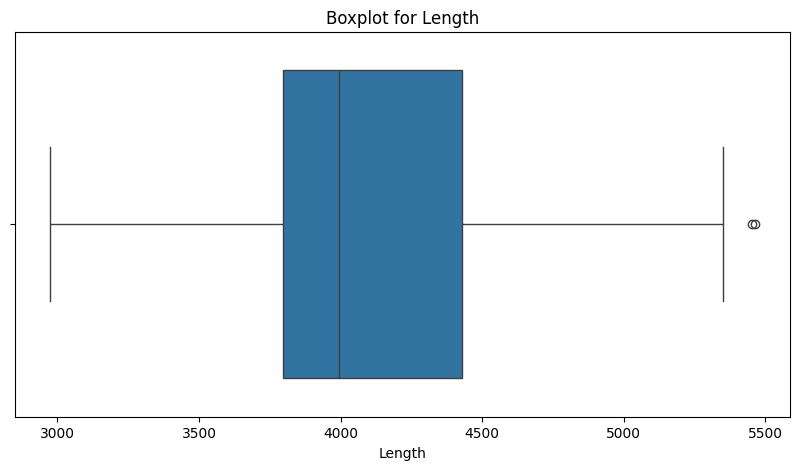

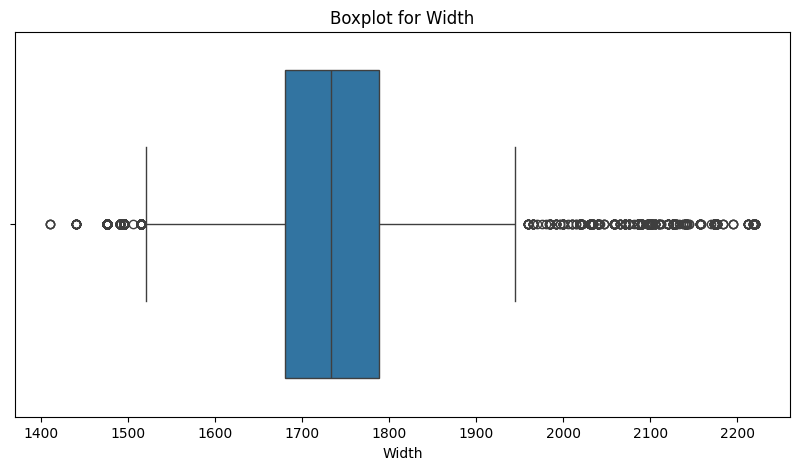

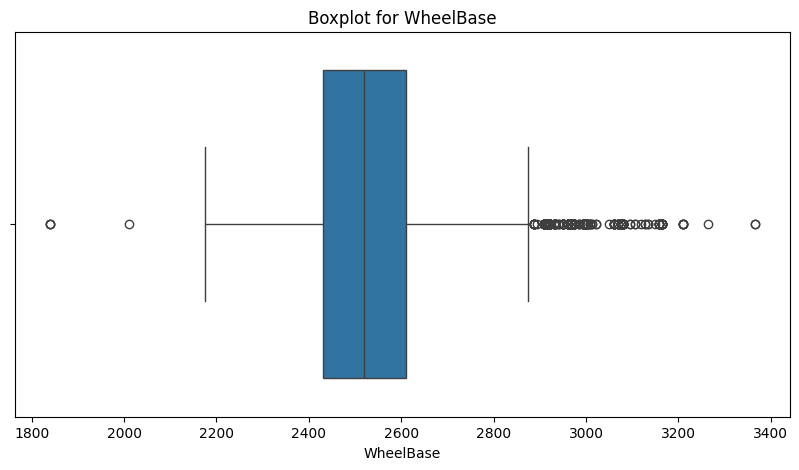

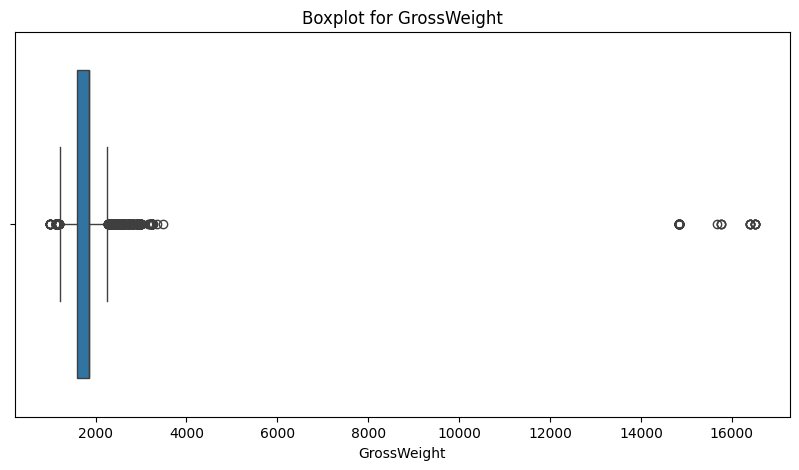

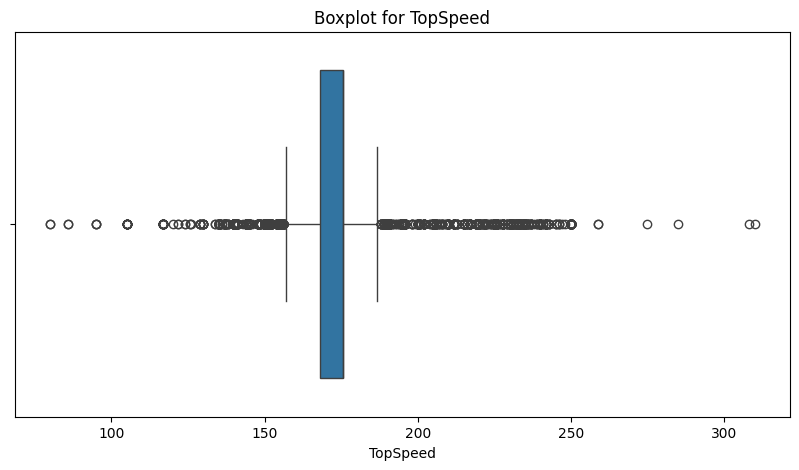

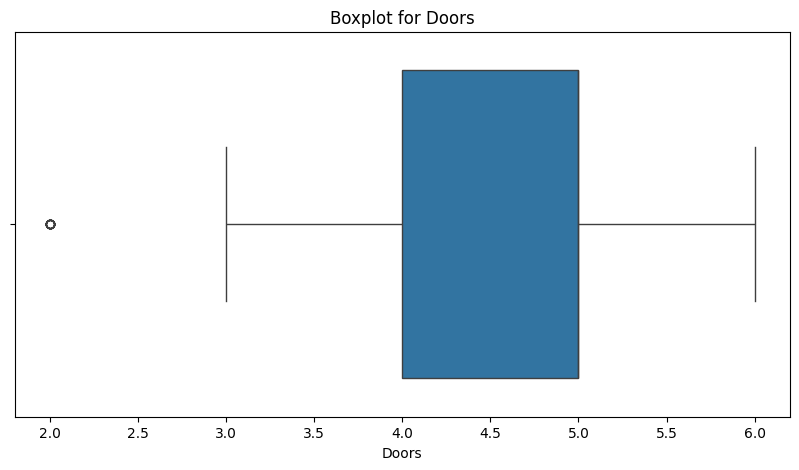

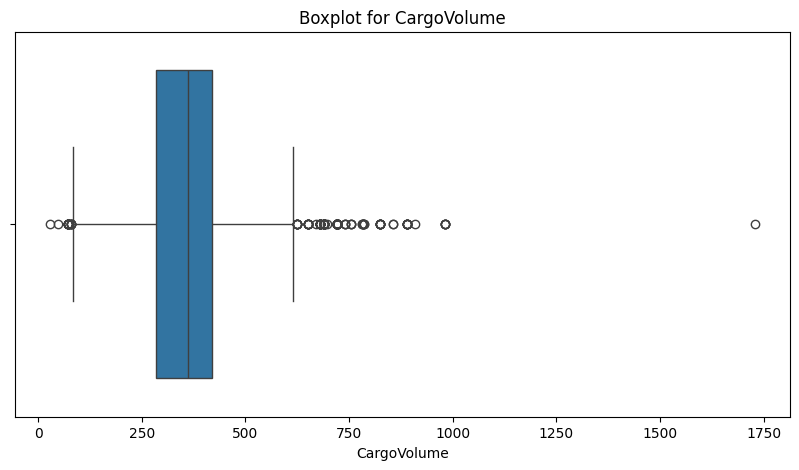

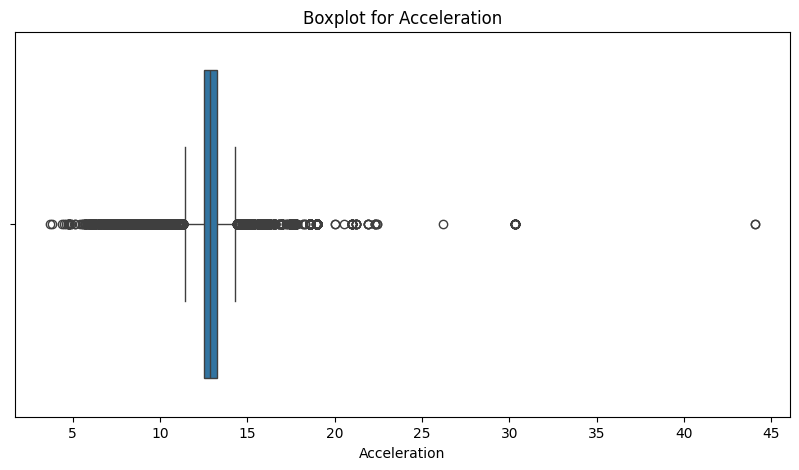

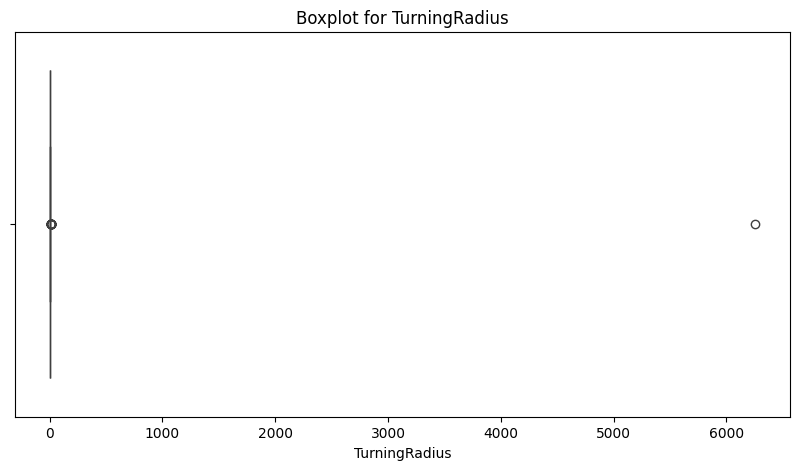

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Filled_Cars_Data.xlsx')

# Step 1: Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect outliers using the IQR method
def detect_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(data, numerical_cols)

# Print outliers for each column
for col, outliers_col in outliers.items():
    if not outliers_col.empty:
        print(f"Outliers detected in {col}:\n", outliers_col.describe(), "\n")

# Step 4: Visualize outliers using boxplots
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()

# Plot the boxplots to visualize outliers
plot_boxplots(data, numerical_cols)


#EDA2.Cleaning Outliers


In [ ]:
import pandas as pd

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Filled_Cars_Data.xlsx')

# Step 1: Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect and clean outliers using the IQR method
def clean_outliers_iqr(df, numerical_cols, method='remove'):
    cleaned_data = df.copy()
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            # Remove rows where outliers are present
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        elif method == 'cap':
            # Cap outliers to the nearest boundary value
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Step 3: Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(data, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Step 4: Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(data, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])

# Optional: Save the cleaned data to new Excel files
cleaned_data_remove.to_excel('Cleaned_Cars_Data_Removed_Outliers.xlsx', index=False)
cleaned_data_cap.to_excel('Cleaned_Cars_Data_Capped_Outliers.xlsx', index=False)


Data cleaned by removing outliers. Remaining rows: 2664
Data cleaned by capping outliers. Remaining rows: 8369


**Rechecking for outliers**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('/content/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Step 1: Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Detect outliers using the IQR method
def detect_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(data, numerical_cols)

# Print outliers for each column
for col, outliers_col in outliers.items():
    if not outliers_col.empty:
        print(f"Outliers detected in {col}:\n", outliers_col.describe(), "\n")

# # Step 4: Visualize outliers using boxplots
# def plot_boxplots(df, numerical_cols):
#     for col in numerical_cols:
#         plt.figure(figsize=(10, 5))
#         sns.boxplot(data=df, x=col)
#         plt.title(f'Boxplot for {col}')
#         plt.show()

# # Plot the boxplots to visualize outliers
# plot_boxplots(data, numerical_cols)


Outliers detected in MaxPower:
 count    6.170000e+02
mean     1.775500e+02
std      2.844477e-14
min      1.775500e+02
25%      1.775500e+02
50%      1.775500e+02
75%      1.775500e+02
max      1.775500e+02
Name: MaxPower, dtype: float64 

Outliers detected in FrontTread:
 count    1910.000000
mean     1482.100264
std        51.839145
min      1439.089067
25%      1439.089067
50%      1439.089067
75%      1544.546560
max      1544.546560
Name: FrontTread, dtype: float64 

Outliers detected in GrossWeight:
 count     636.000000
mean     2260.388292
std         0.000000
min      2260.388292
25%      2260.388292
50%      2260.388292
75%      2260.388292
max      2260.388292
Name: GrossWeight, dtype: float64 



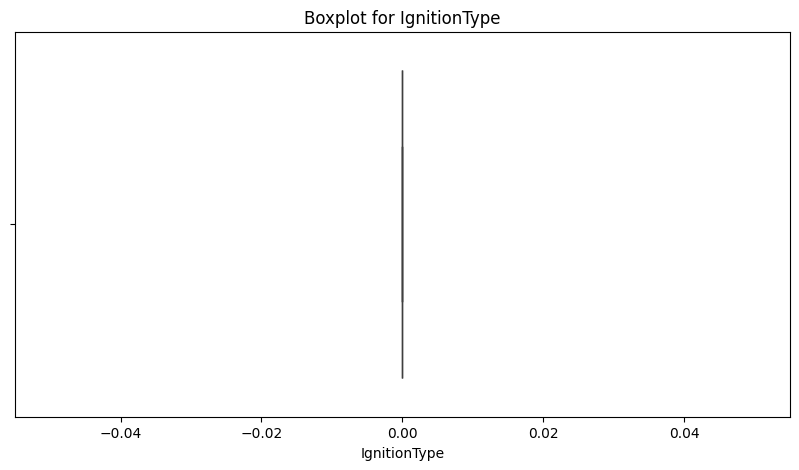

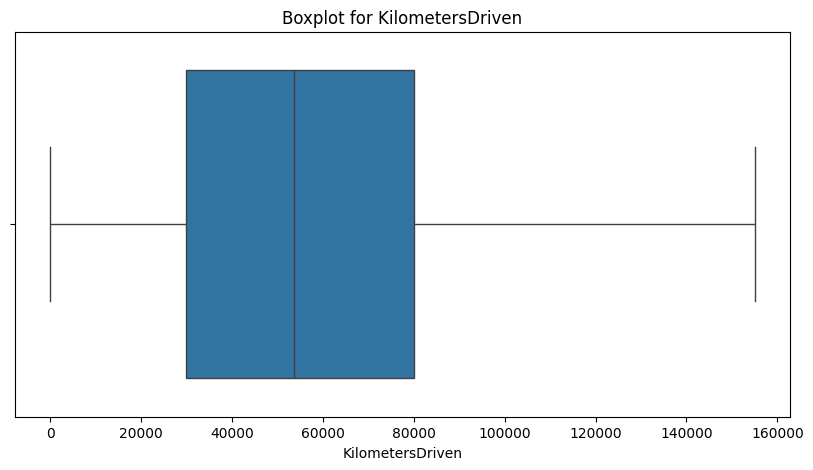

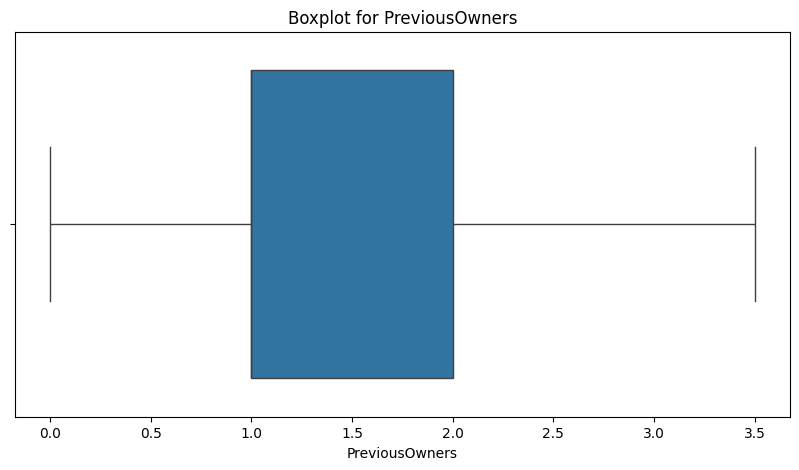

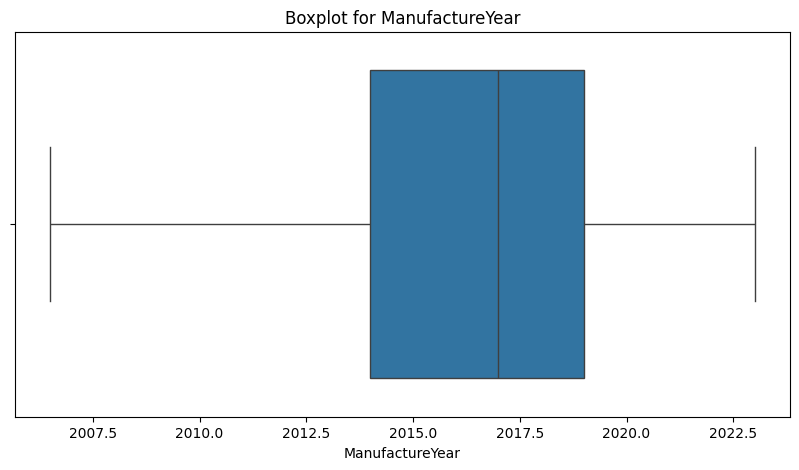

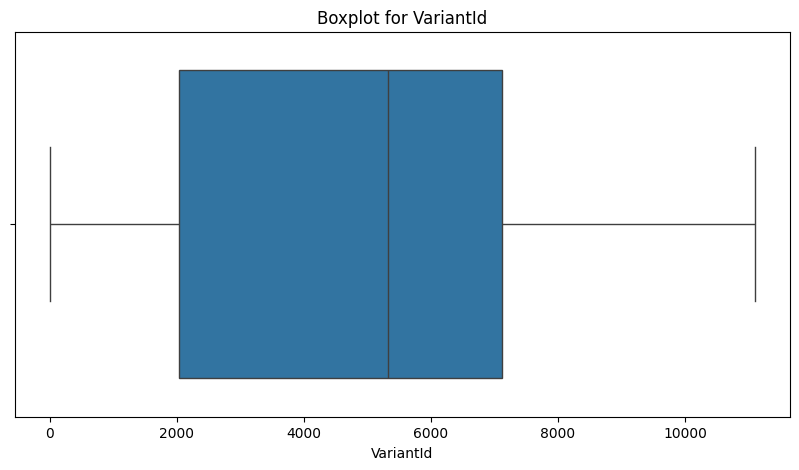

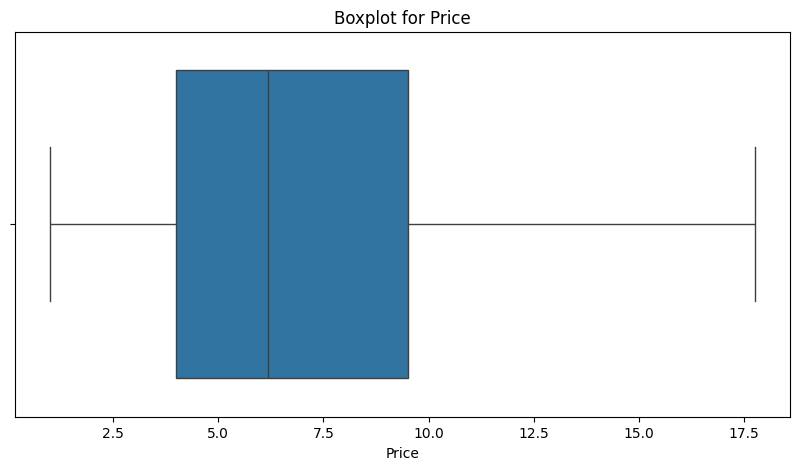

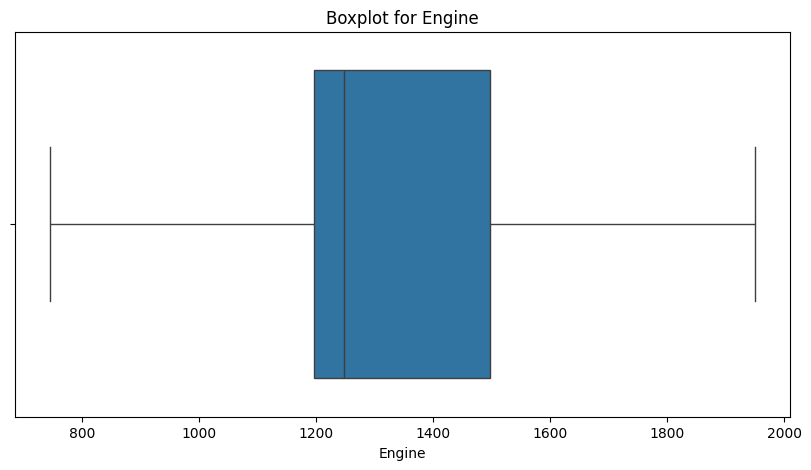

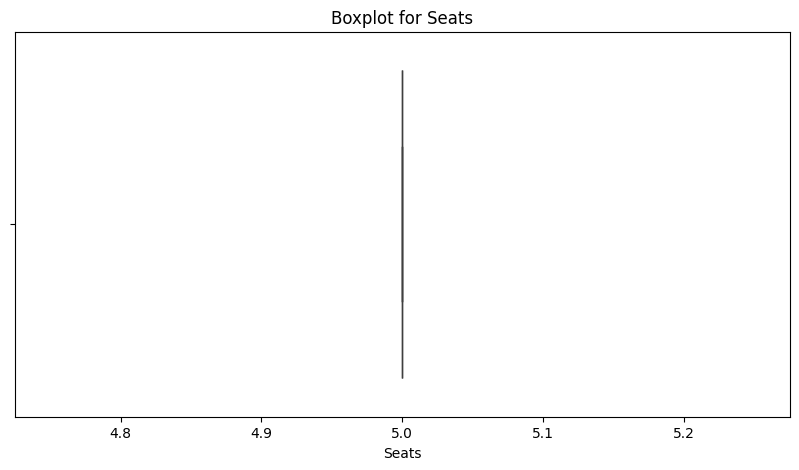

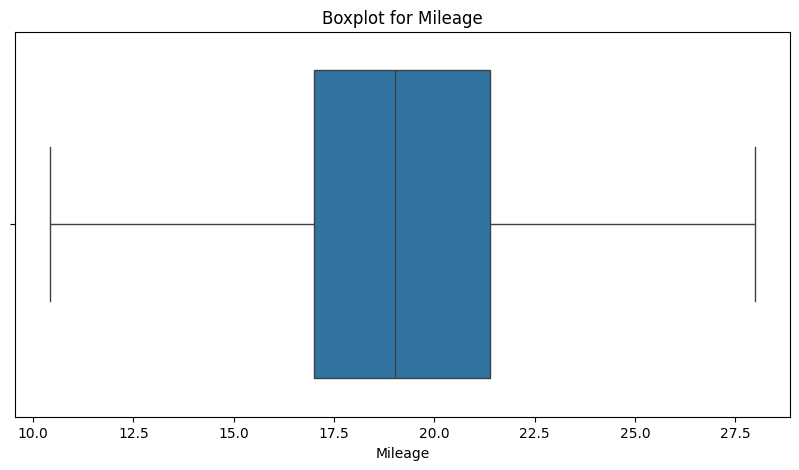

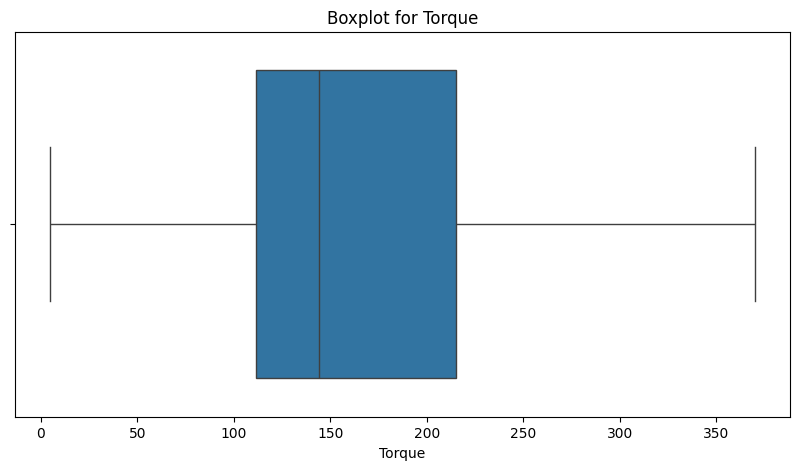

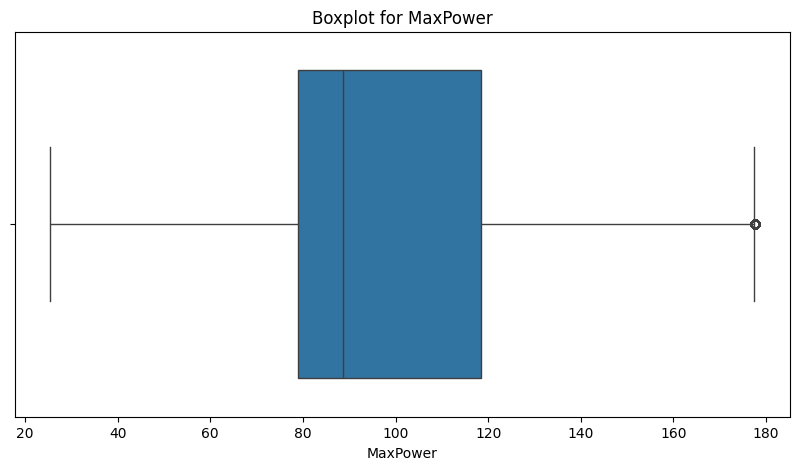

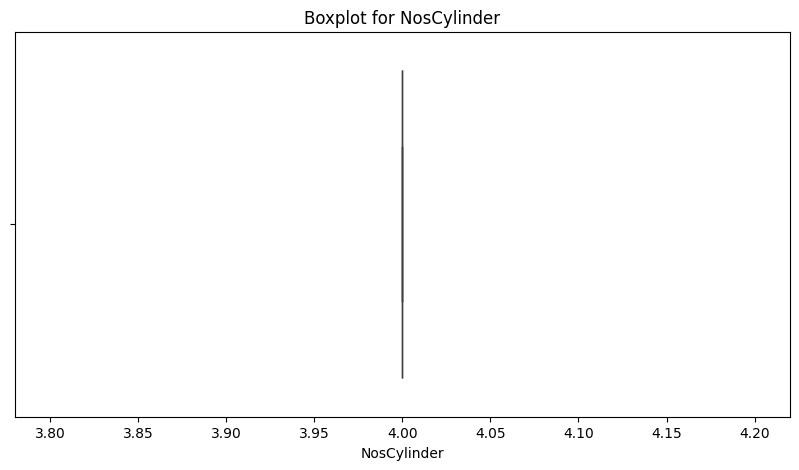

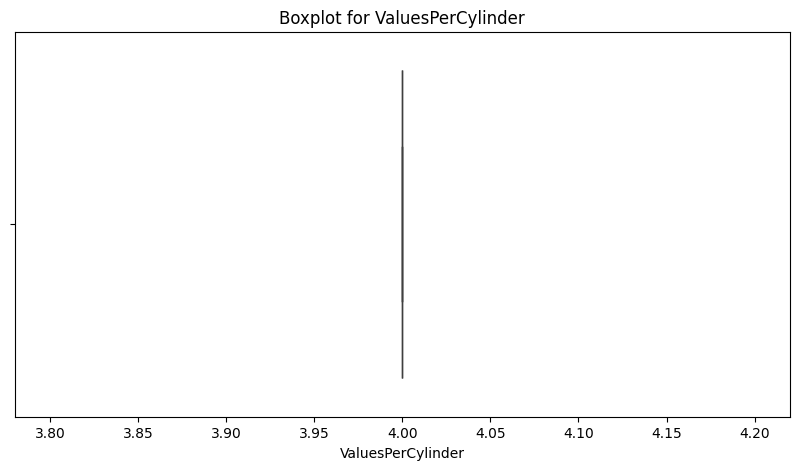

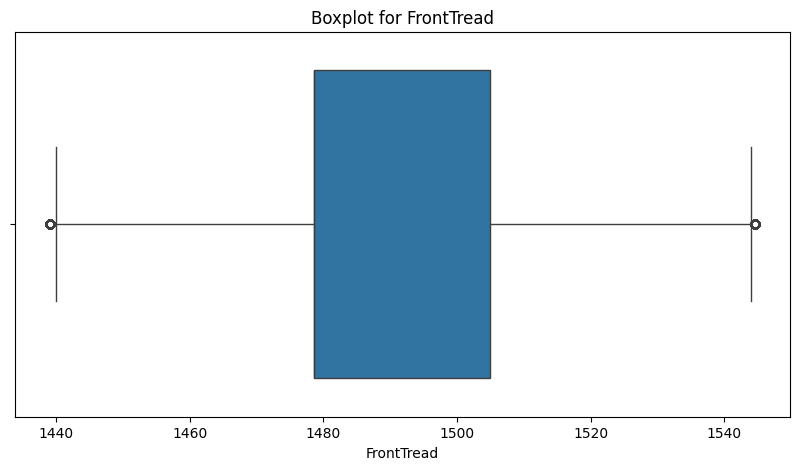

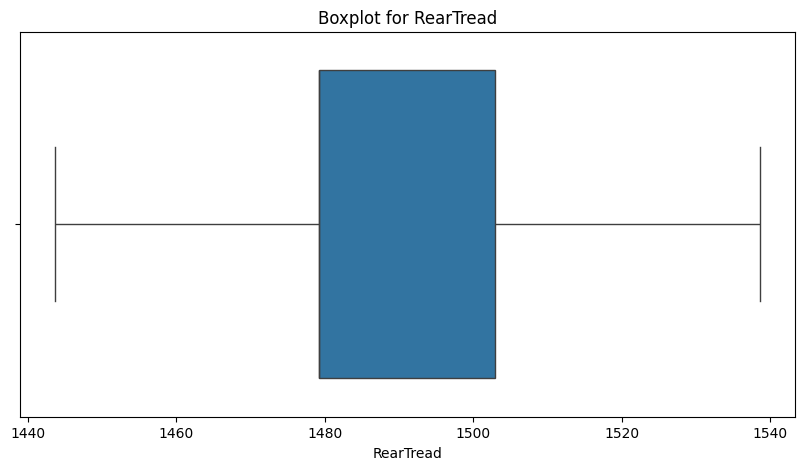

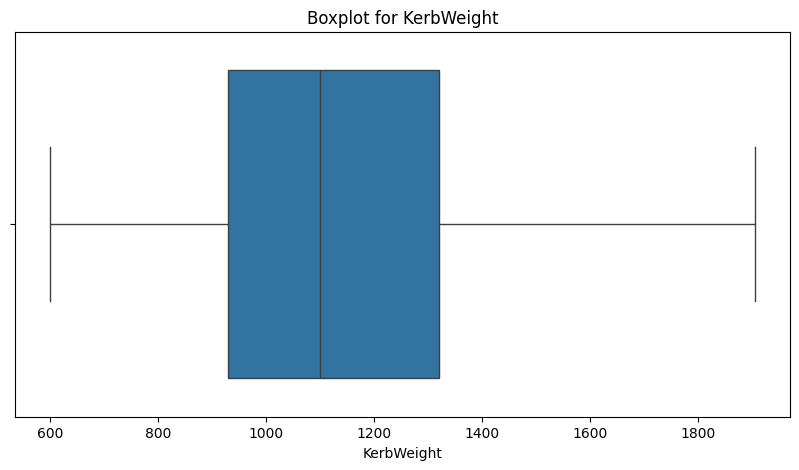

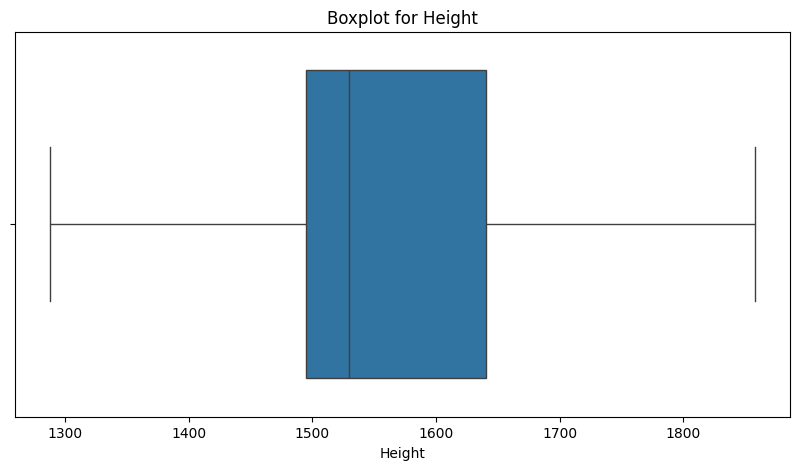

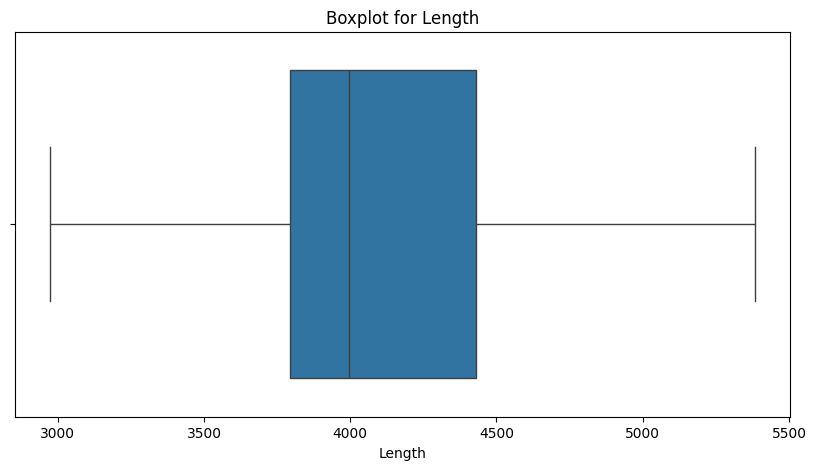

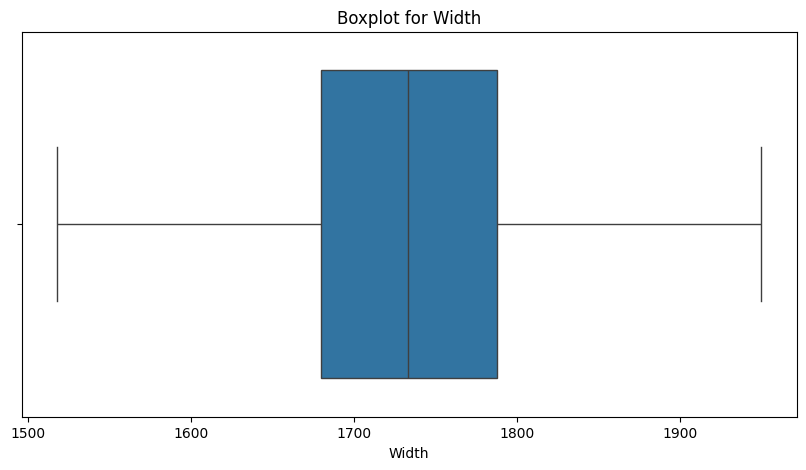

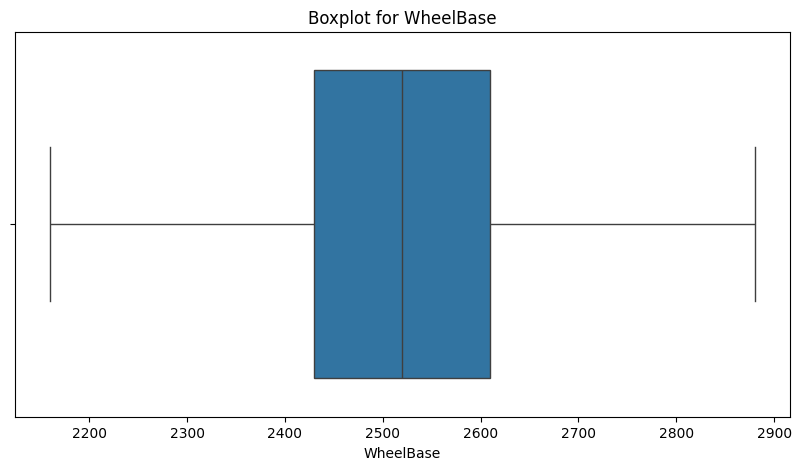

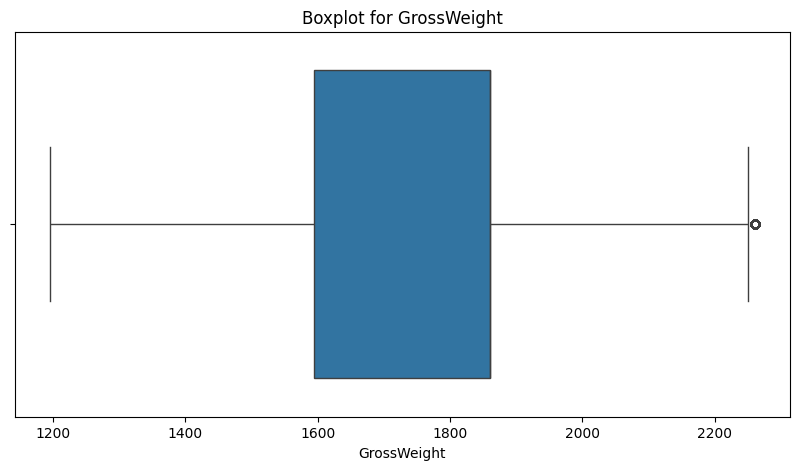

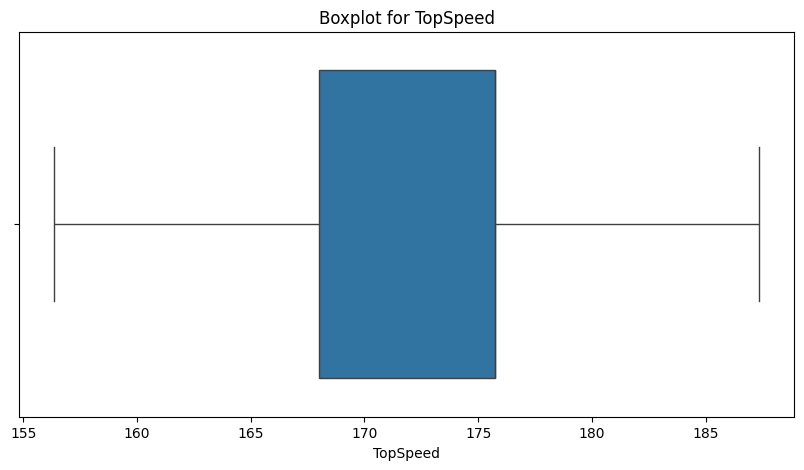

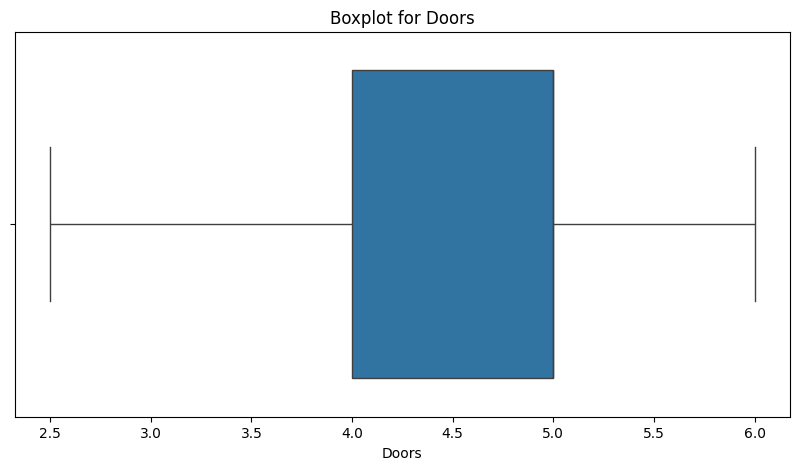

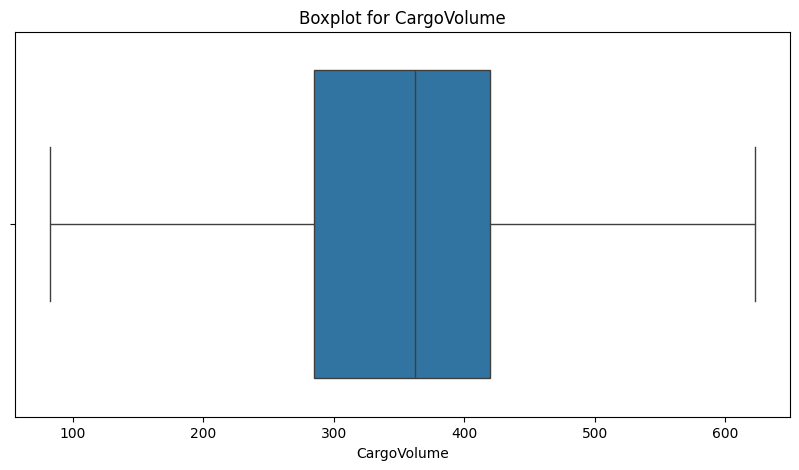

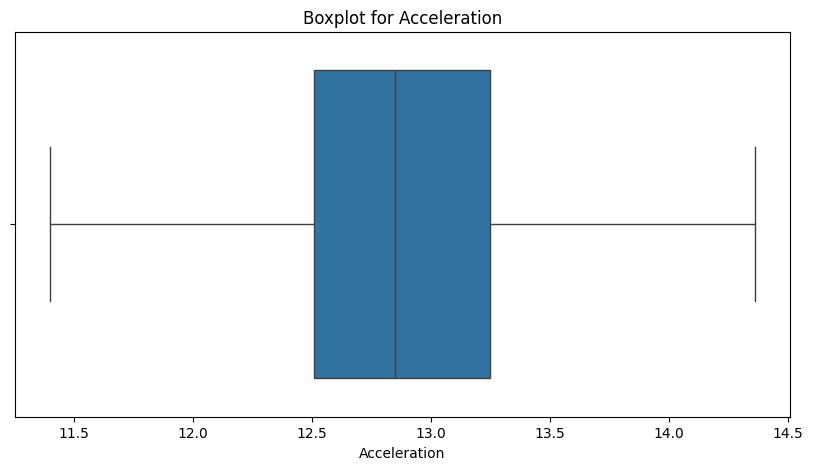

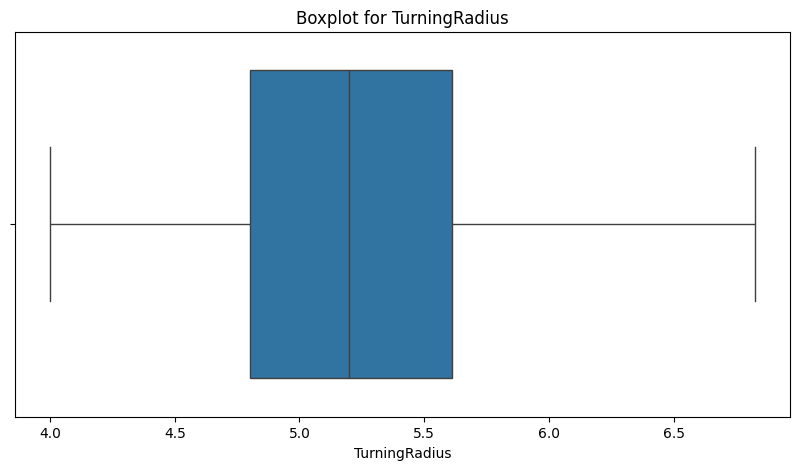

In [ ]:
# Step 4: Visualize outliers using boxplots
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()

# Plot the boxplots to visualize outliers
plot_boxplots(data, numerical_cols)

#EDA3.Descriptive Analysis, Data Visualizations and Feature Selection

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Step 1: Visualize distributions of numerical variables
def plot_numerical_distributions(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols].hist(bins=30, figsize=(20, 20), layout=(7, 4))  # Adjust layout as needed
    plt.tight_layout()
    plt.show()

# Step 2: Examine correlations between numerical variables and the target variable (Price)
def plot_correlation_heatmap(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()

    # Identify features most correlated with 'Price'
    price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
    print("Top features most correlated with Price:\n", price_correlation.head(10))

# Step 3: Analyze categorical variables for patterns
def analyze_categorical_variables(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=col, y='Price', data=df)
        plt.xticks(rotation=90)
        plt.title(f'Price Distribution by {col}')
        plt.show()


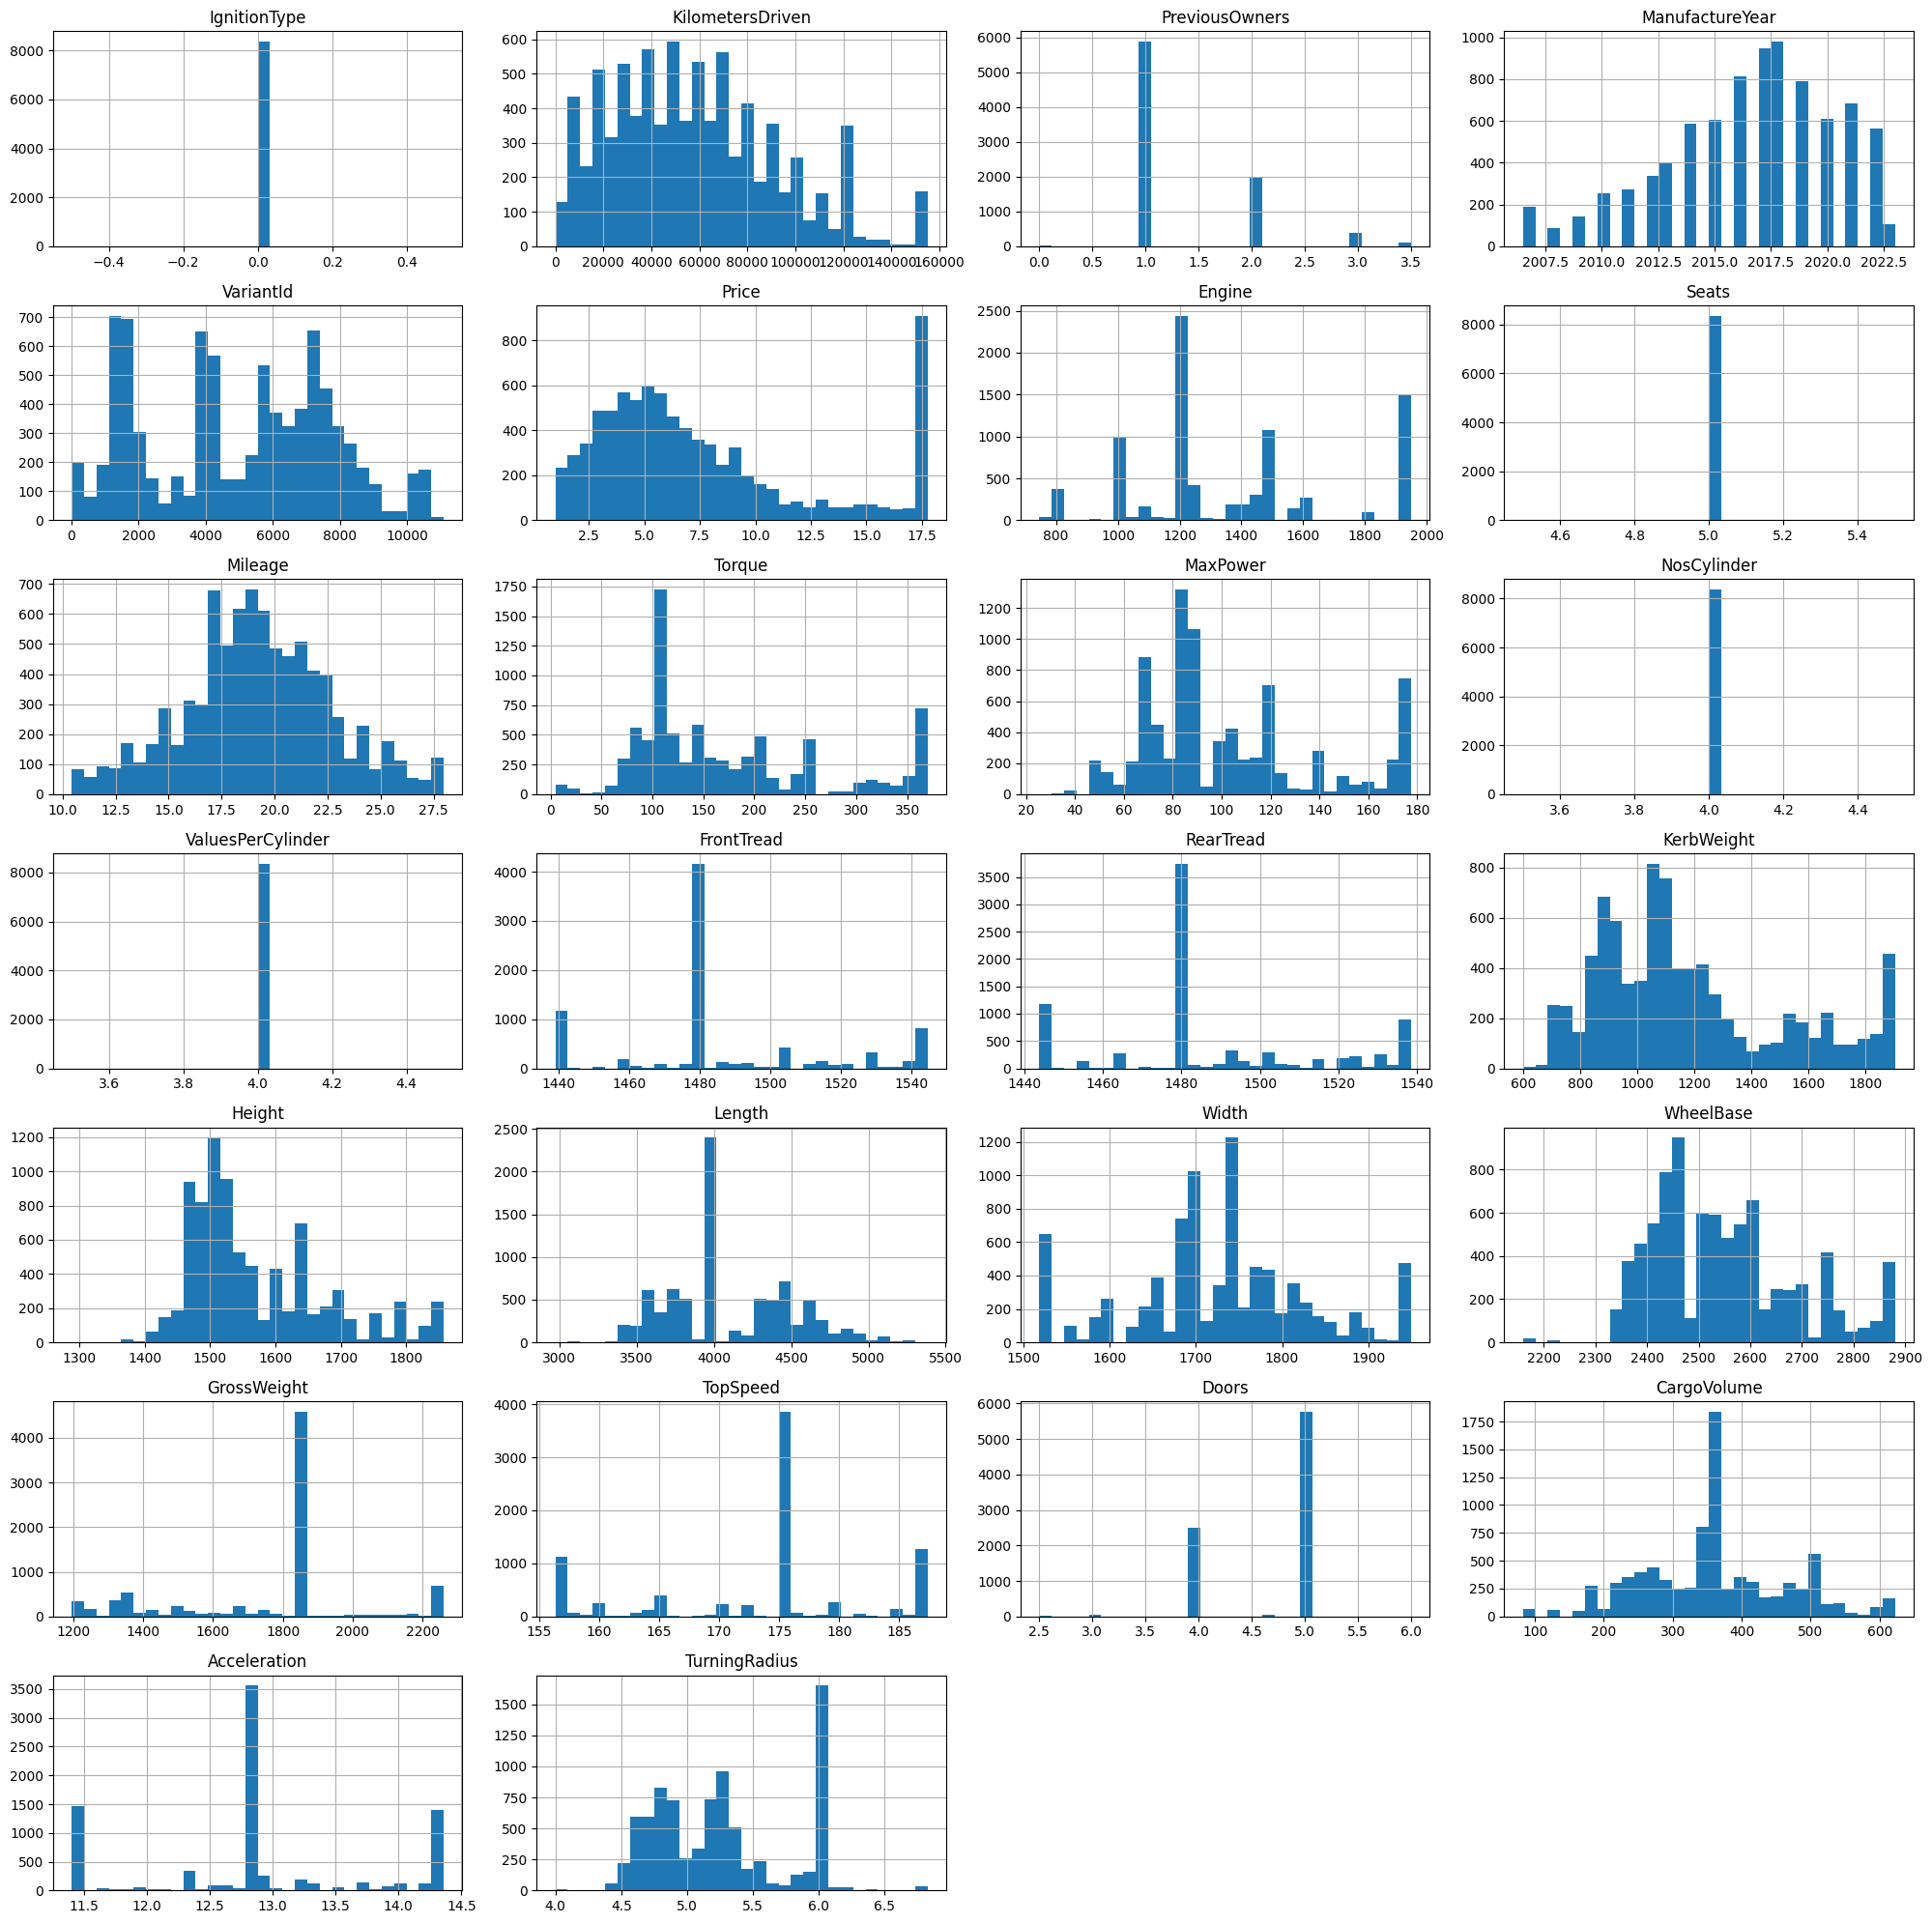

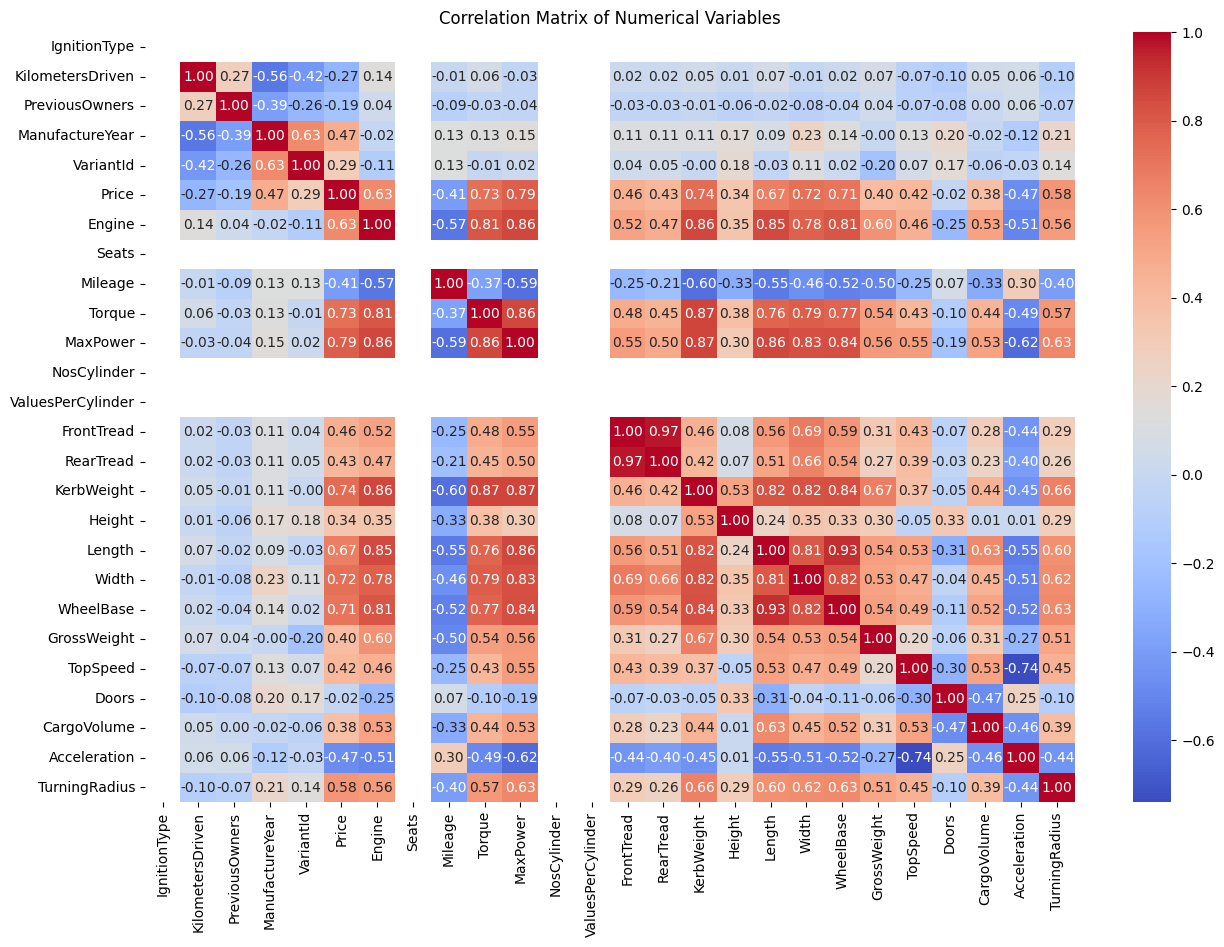

Top features most correlated with Price:
 Price              1.000000
MaxPower           0.785498
KerbWeight         0.735321
Torque             0.726927
Width              0.721658
WheelBase          0.710437
Length             0.672103
Engine             0.626821
TurningRadius      0.581284
ManufactureYear    0.470742
Name: Price, dtype: float64


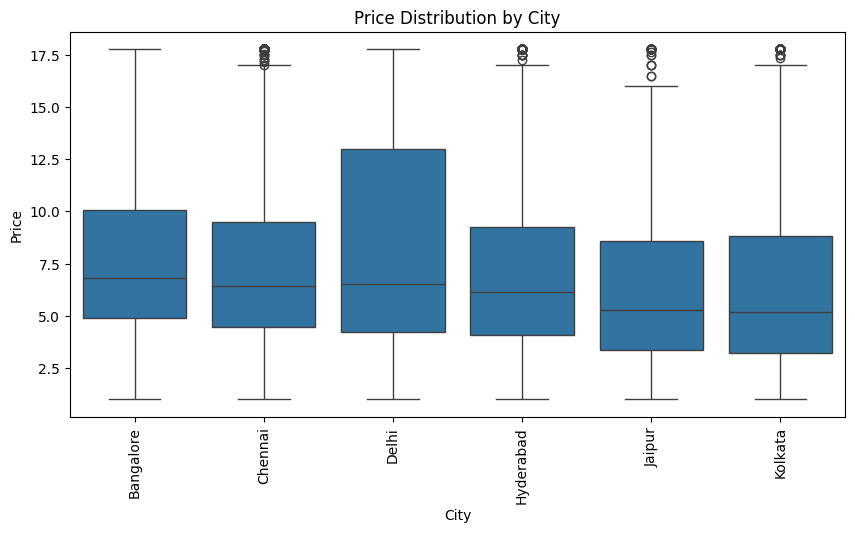

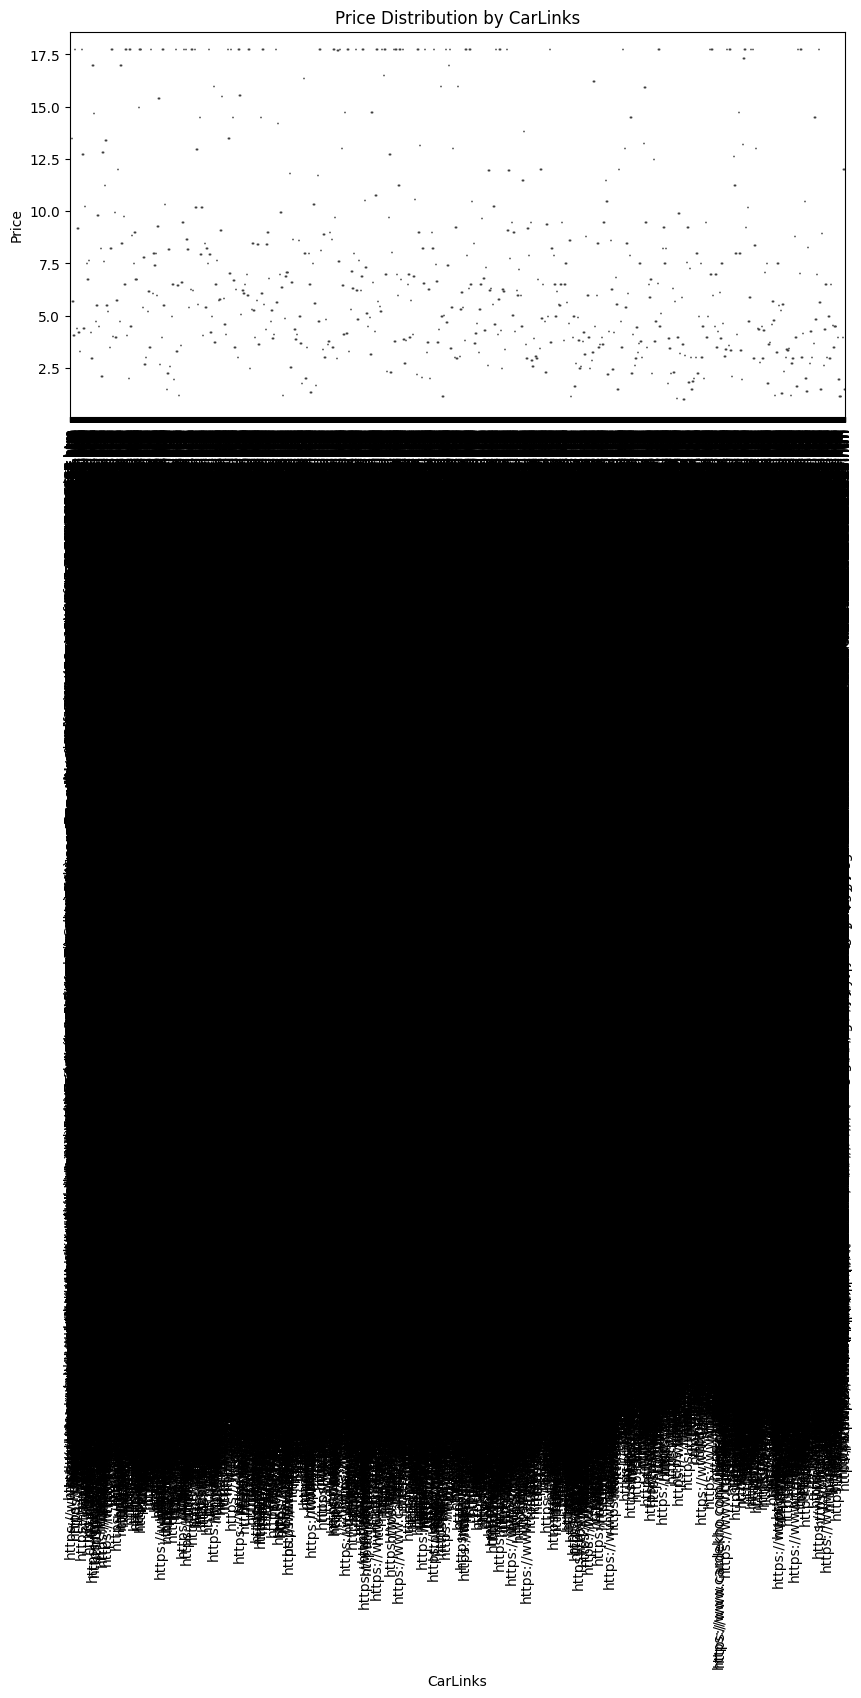

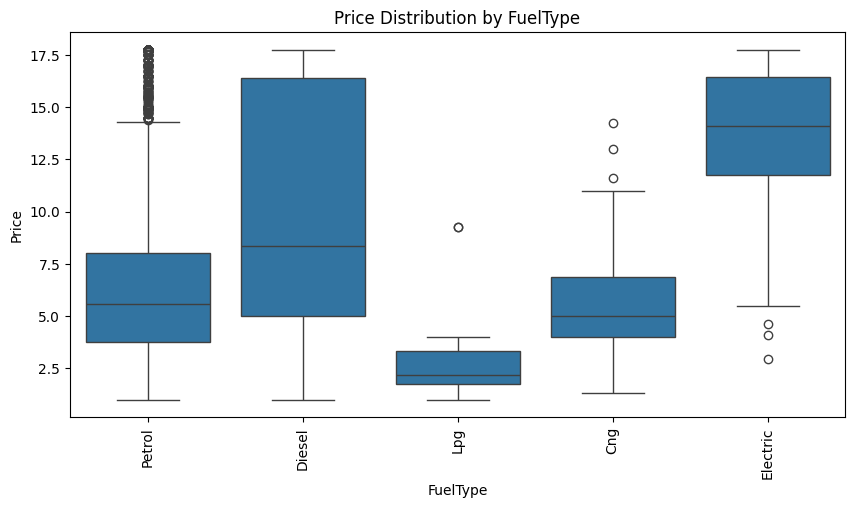

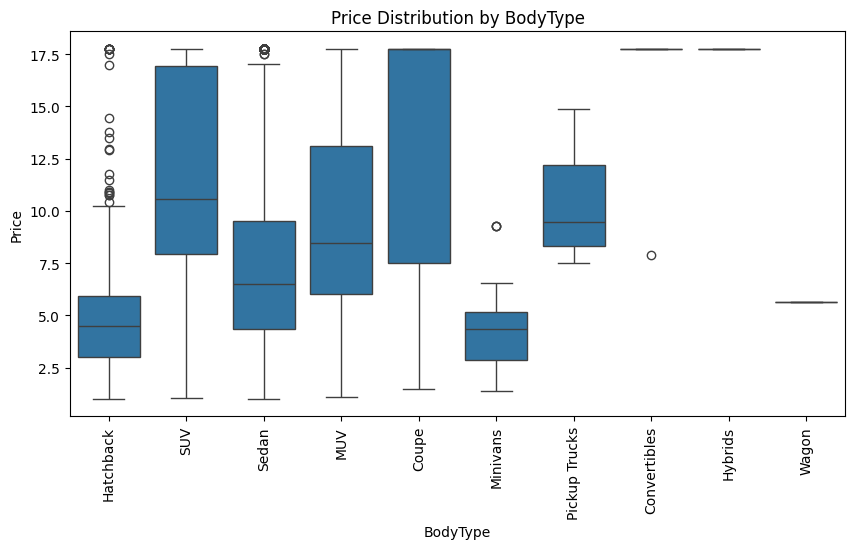

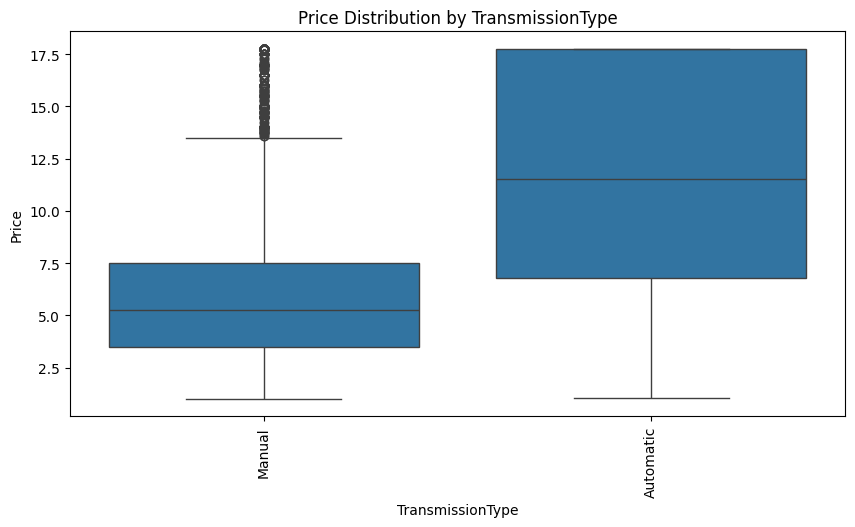

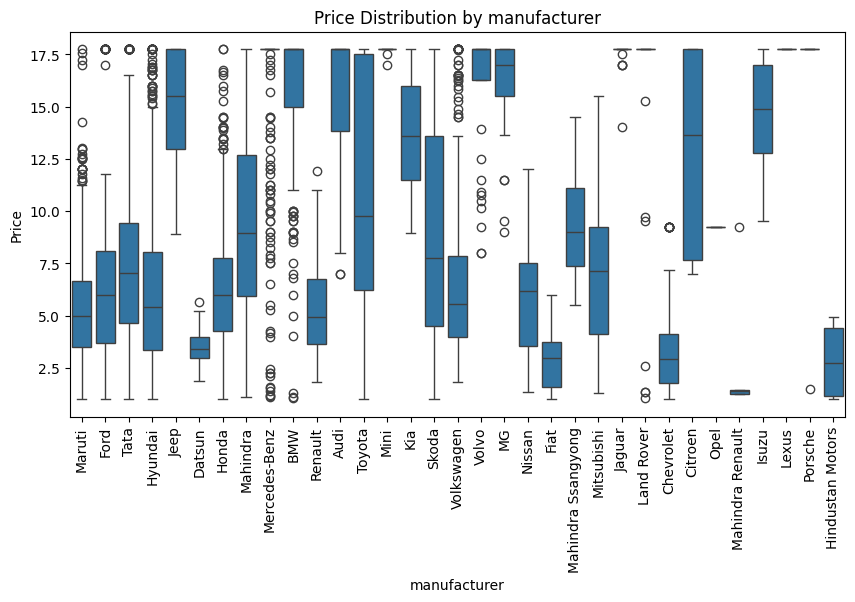

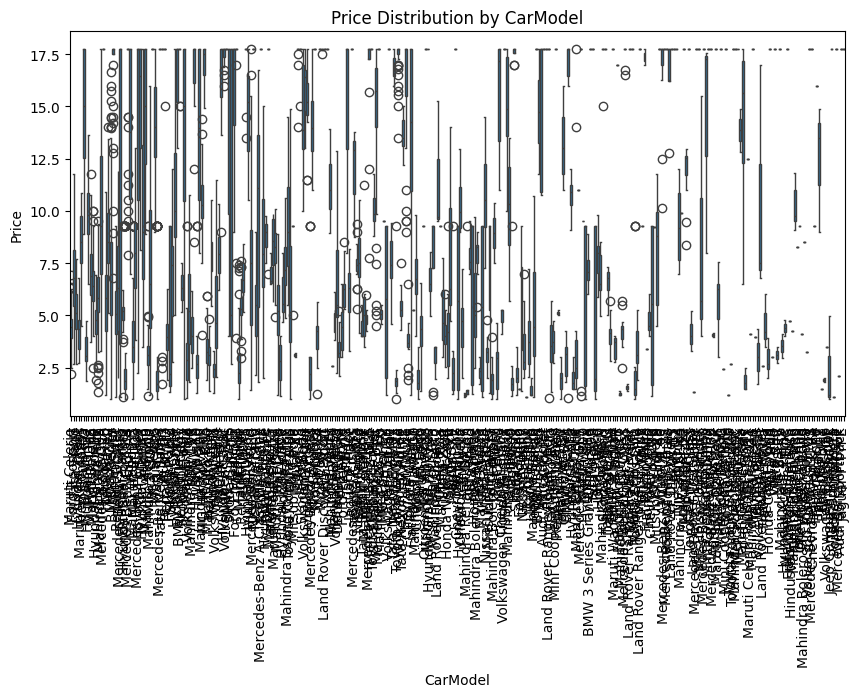

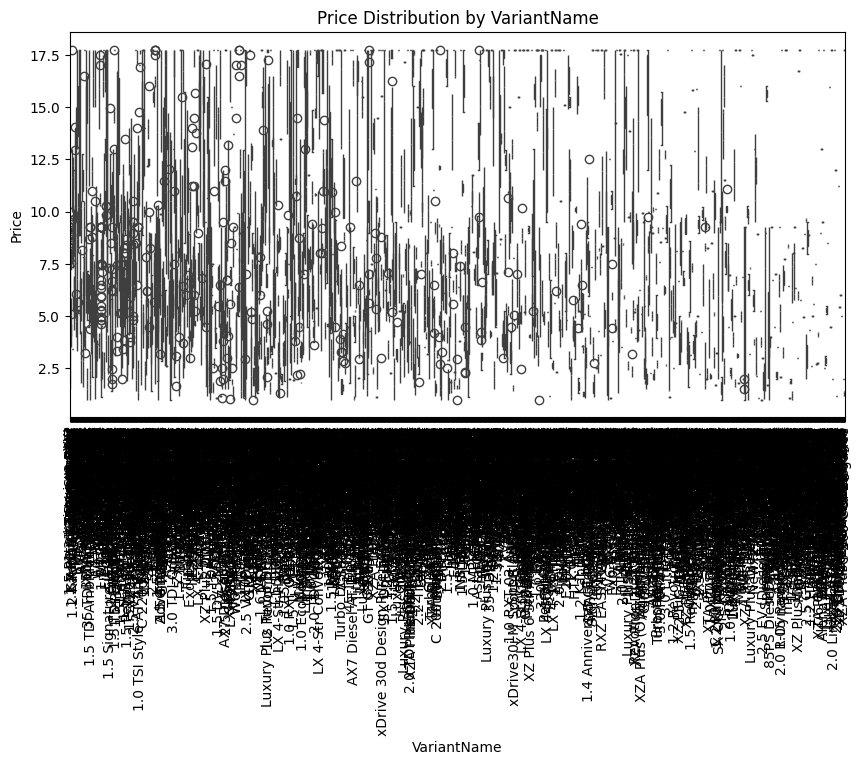

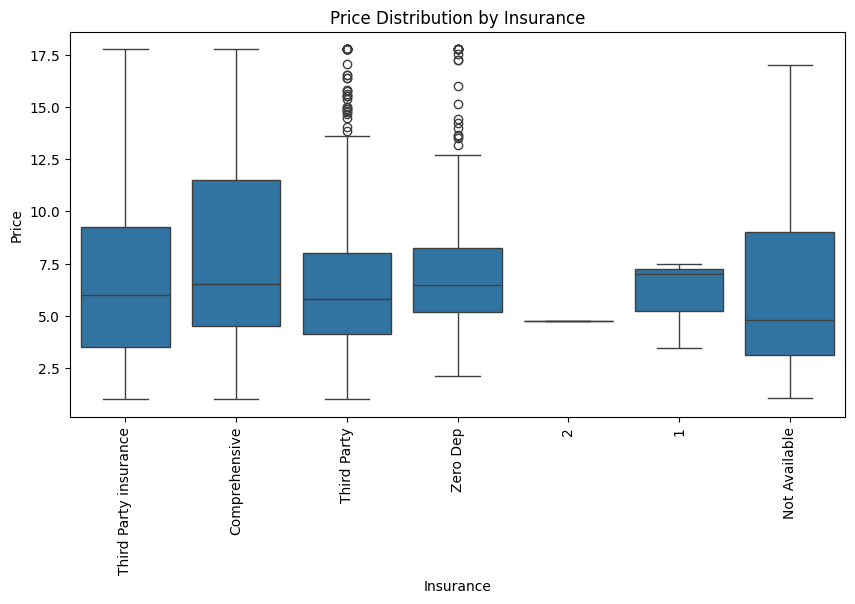

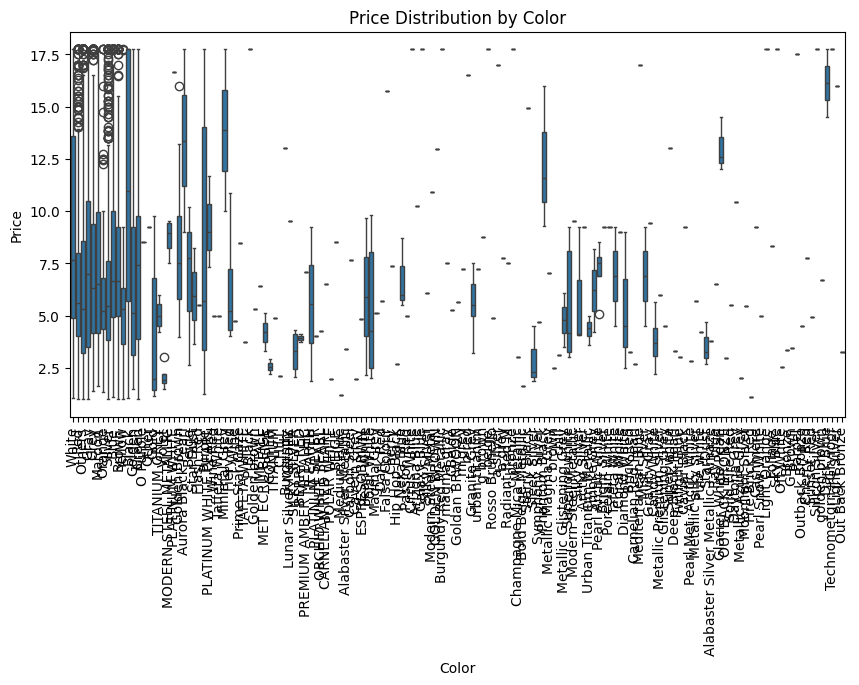

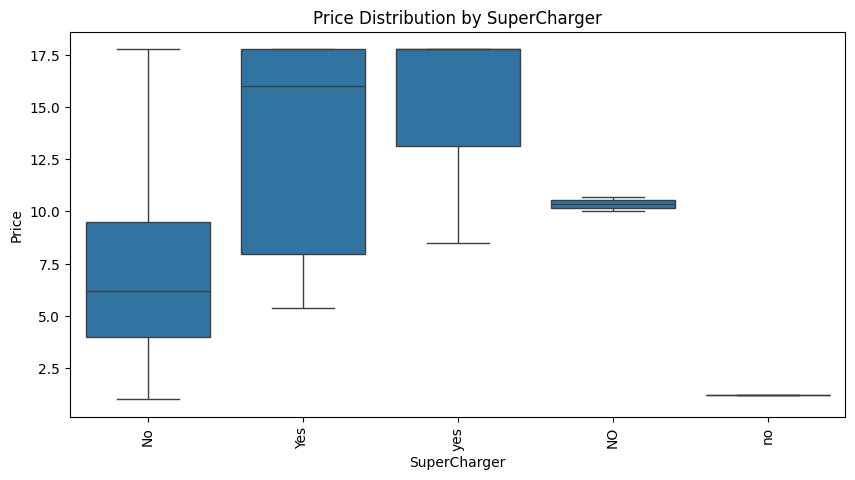

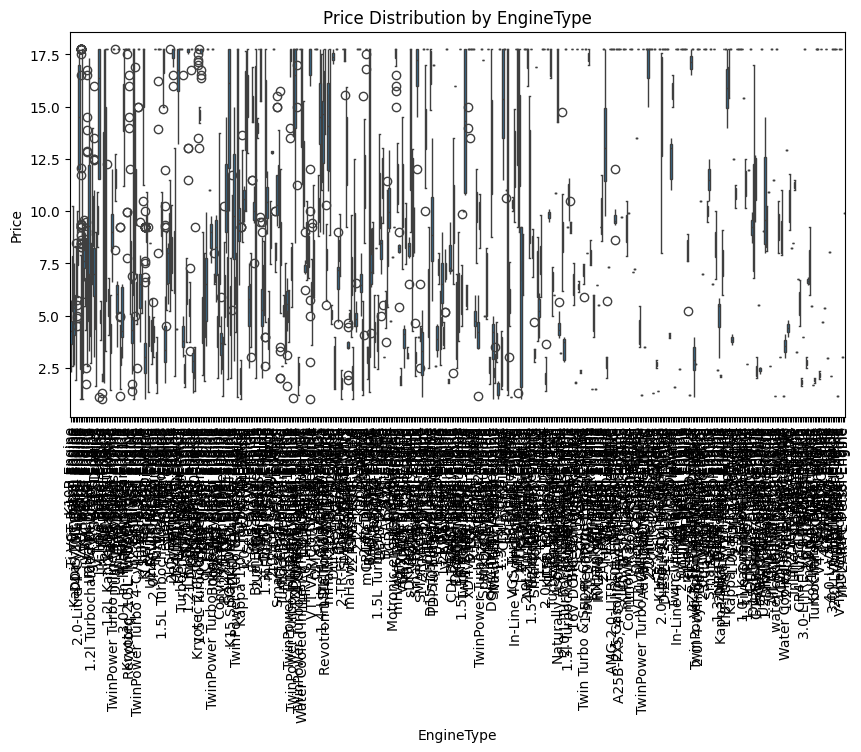

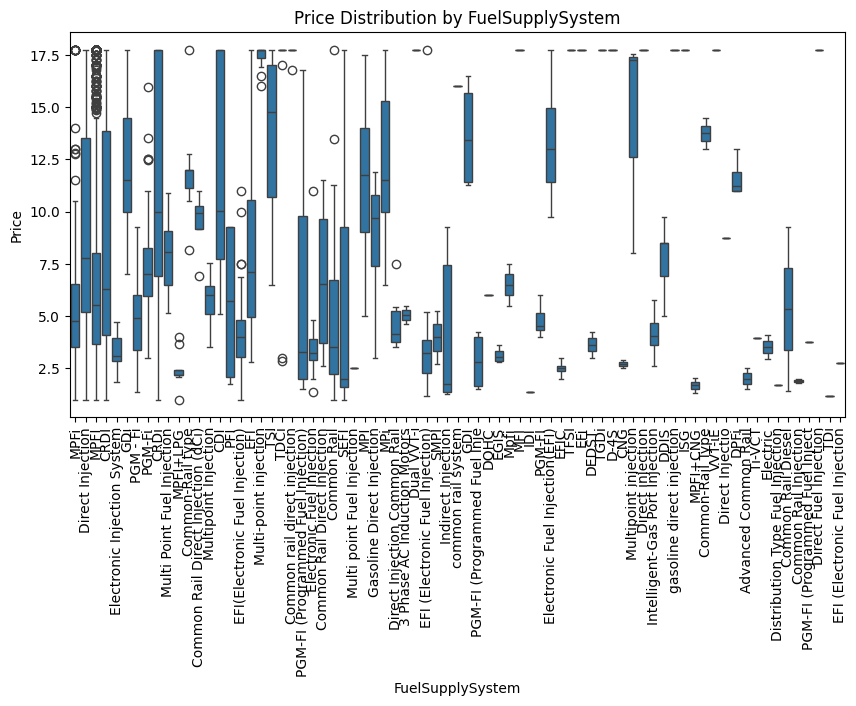

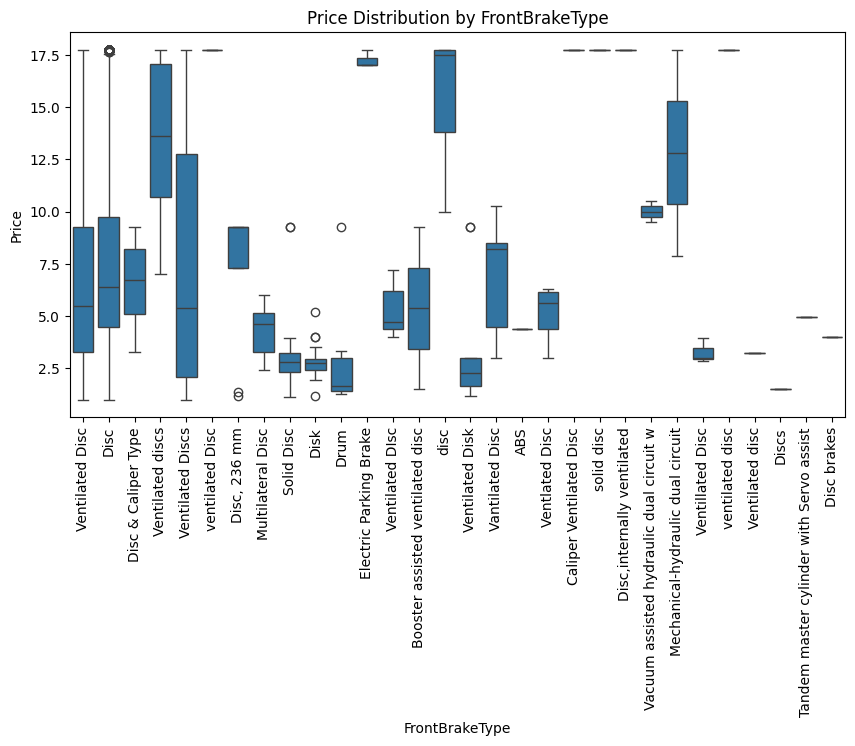

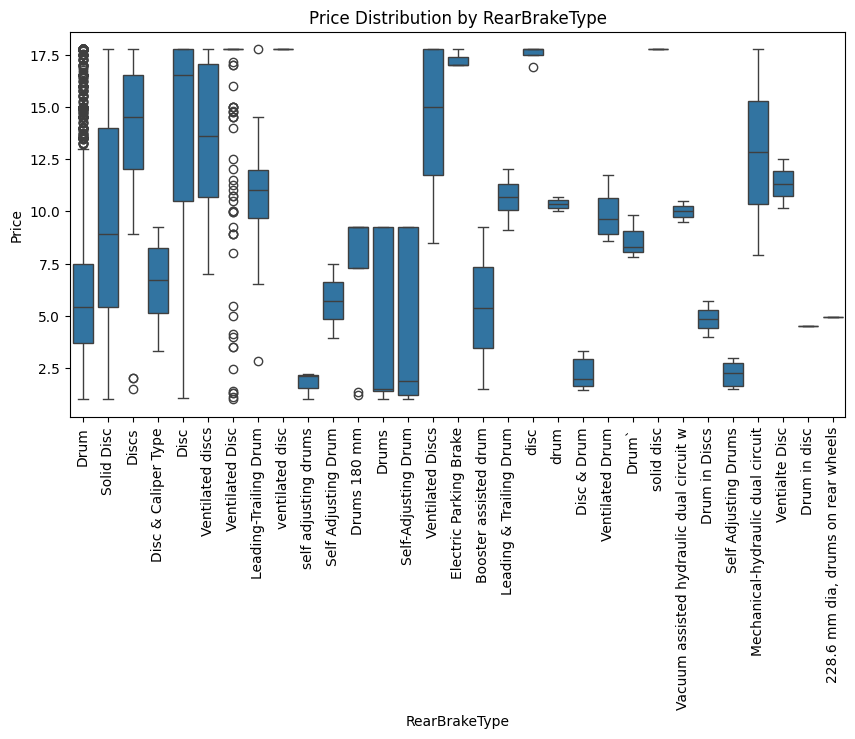

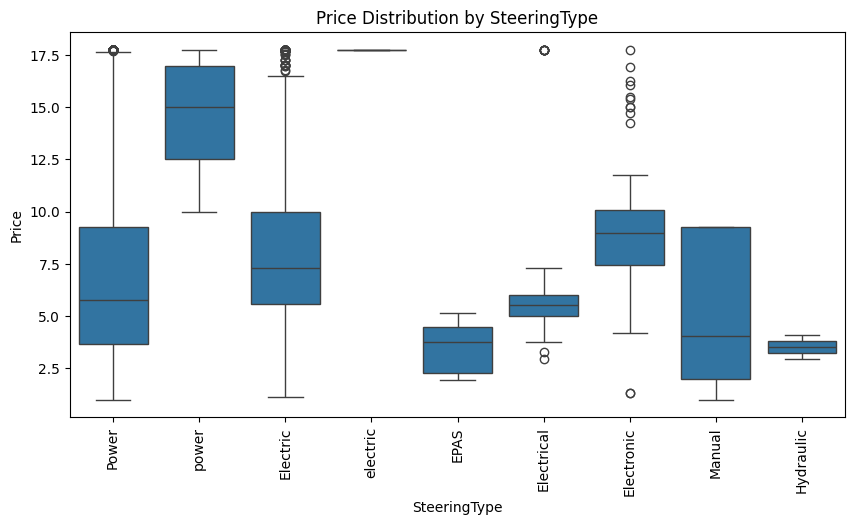

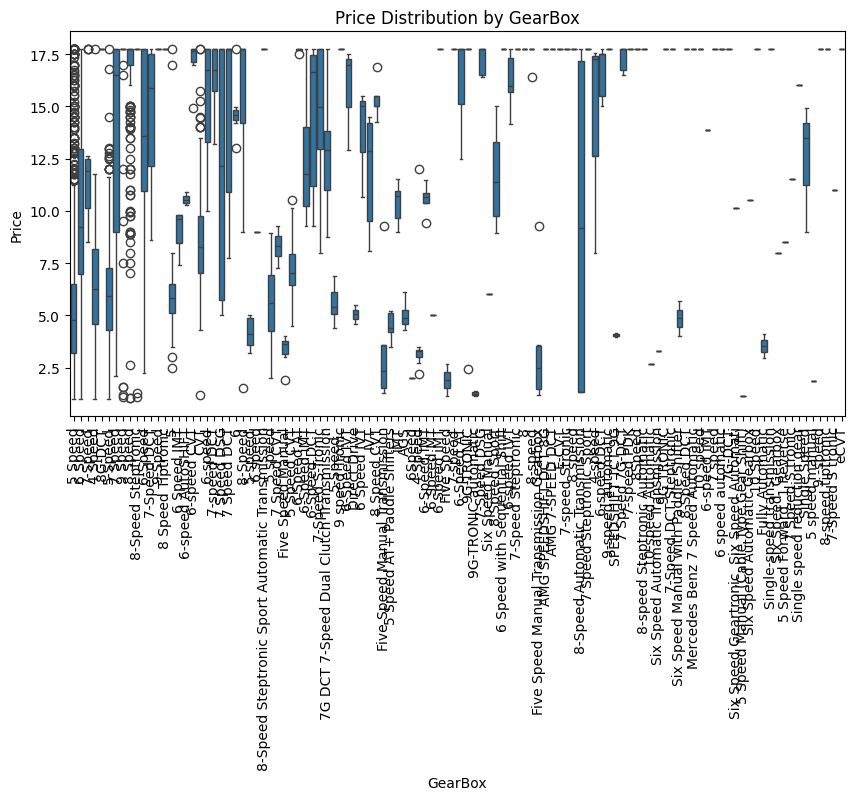

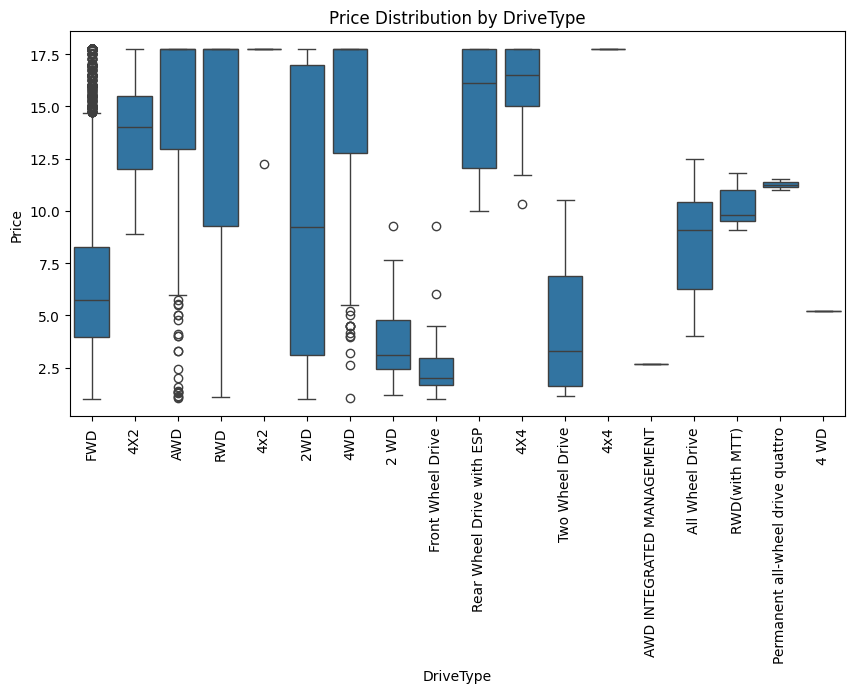

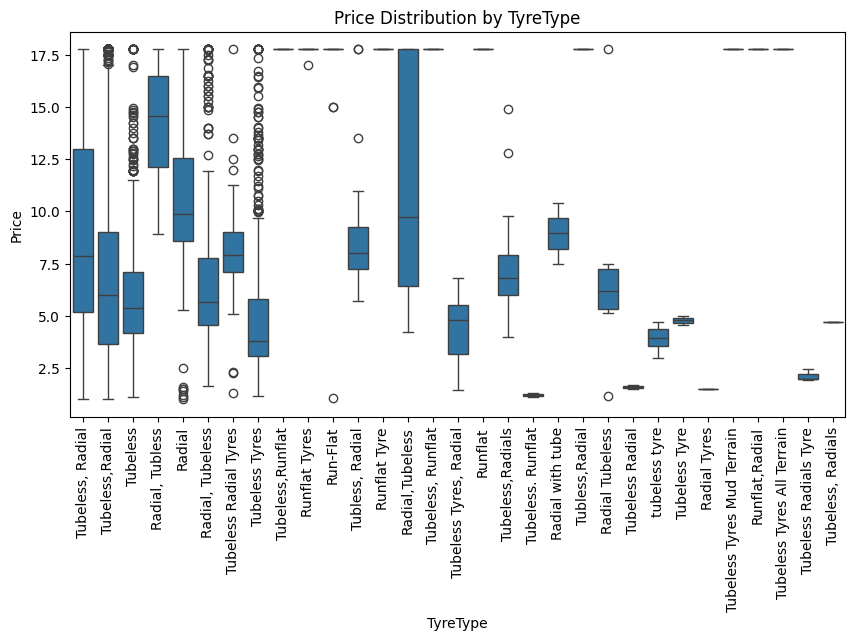

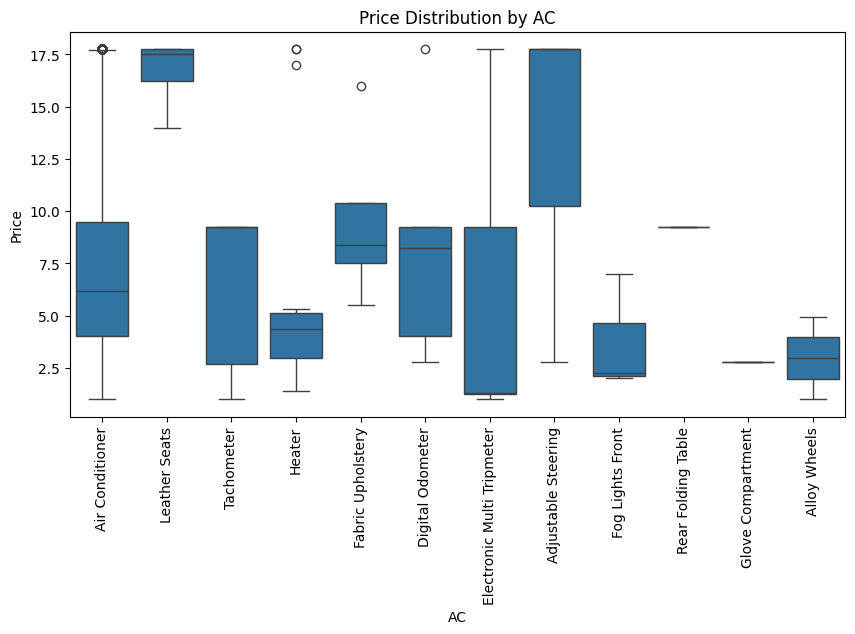

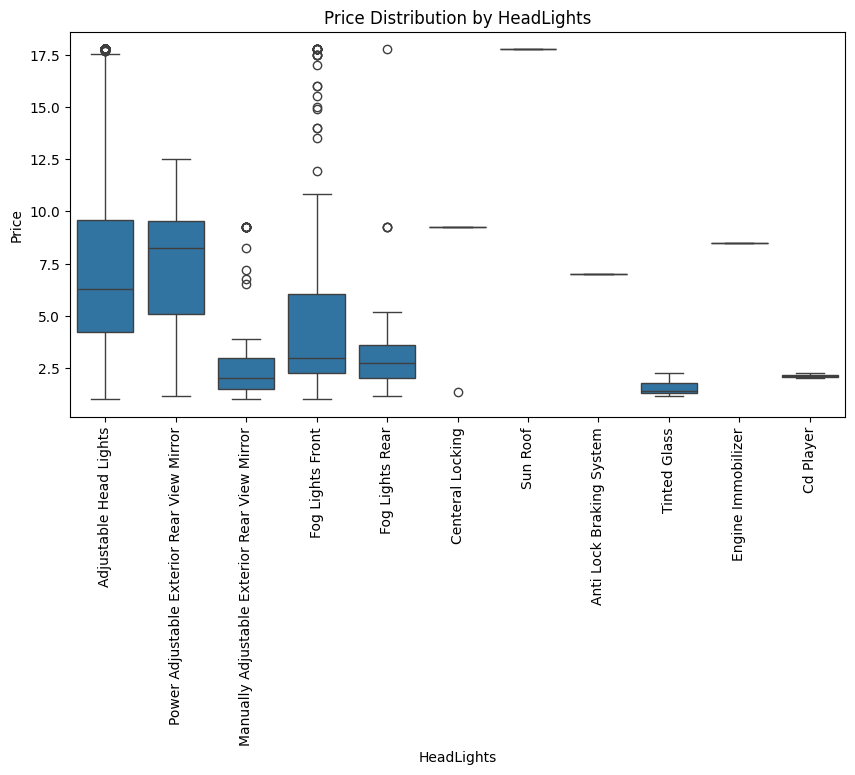

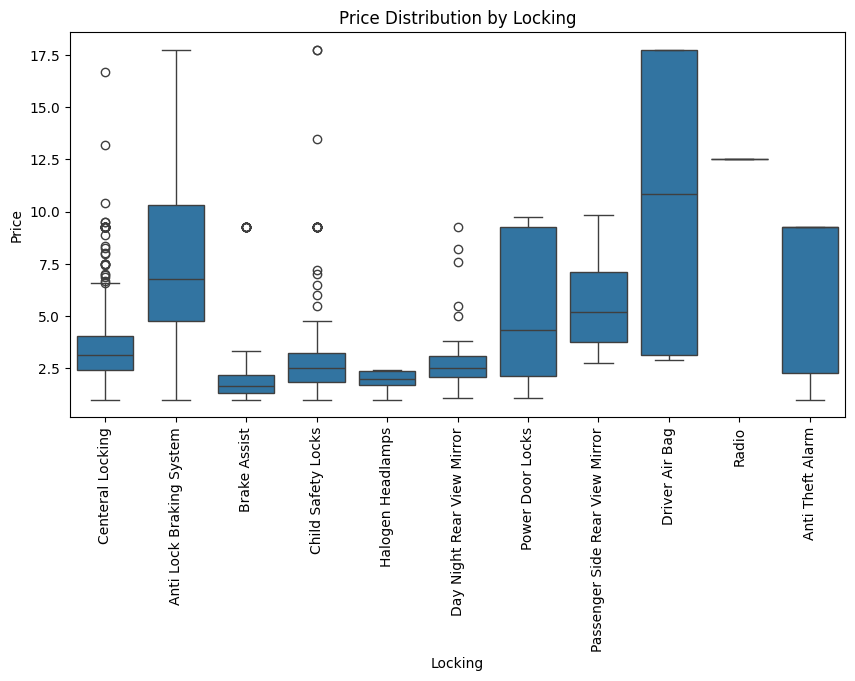

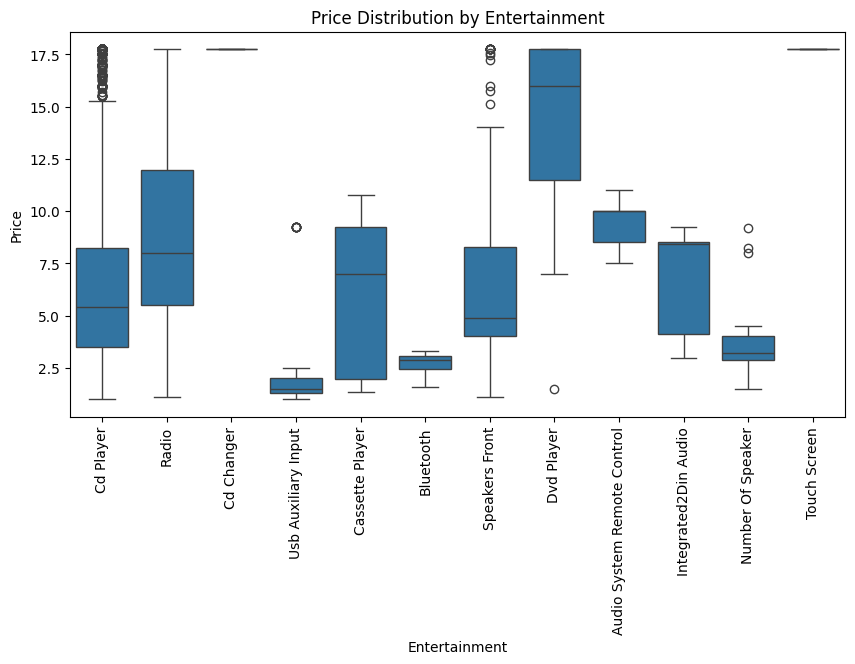

Top important features:
 Width               0.475358
MaxPower            0.169334
ManufactureYear     0.129420
GearBox             0.021723
TurningRadius       0.020890
Length              0.020101
WheelBase           0.017388
VariantId           0.015275
KilometersDriven    0.013119
City                0.011908
dtype: float64


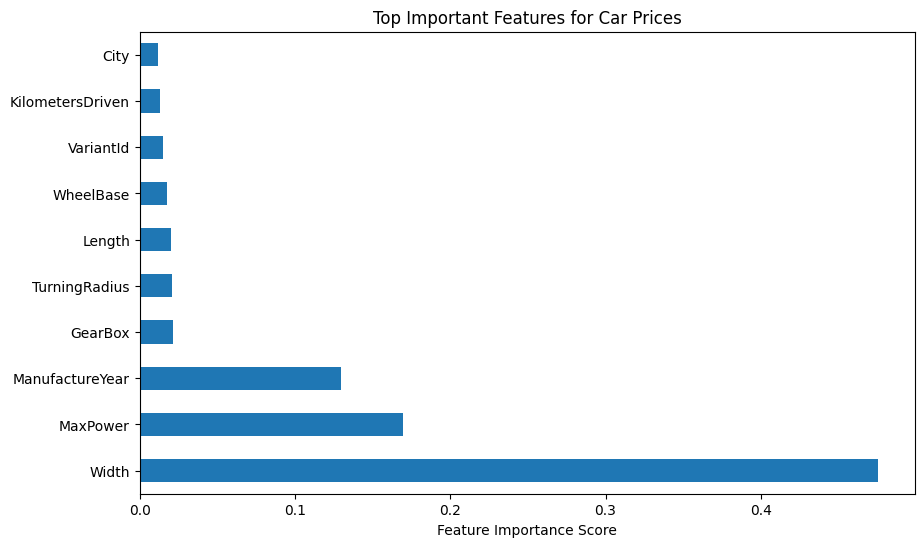

In [ ]:

# Step 4: Identify important features using feature importance from a simple model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def identify_important_features(df):
    # Handle categorical data with label encoding for simplicity
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include=['object']).columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

    # Split data into features and target variable
    X = df_encoded.drop('Price', axis=1)
    y = df_encoded['Price']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    top_features = feature_importances.sort_values(ascending=False).head(10)
    print("Top important features:\n", top_features)

    # Plot top important features
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top Important Features for Car Prices')
    plt.xlabel('Feature Importance Score')
    plt.show()

# Execute the functions
plot_numerical_distributions(data)
plot_correlation_heatmap(data)
analyze_categorical_variables(data)
identify_important_features(data)



**Better model for Feature Selection**

Mean Absolute Error: 0.7987108469851869
Mean Squared Error: 1.9801215944113941
R^2 Score: 0.9148552702660271


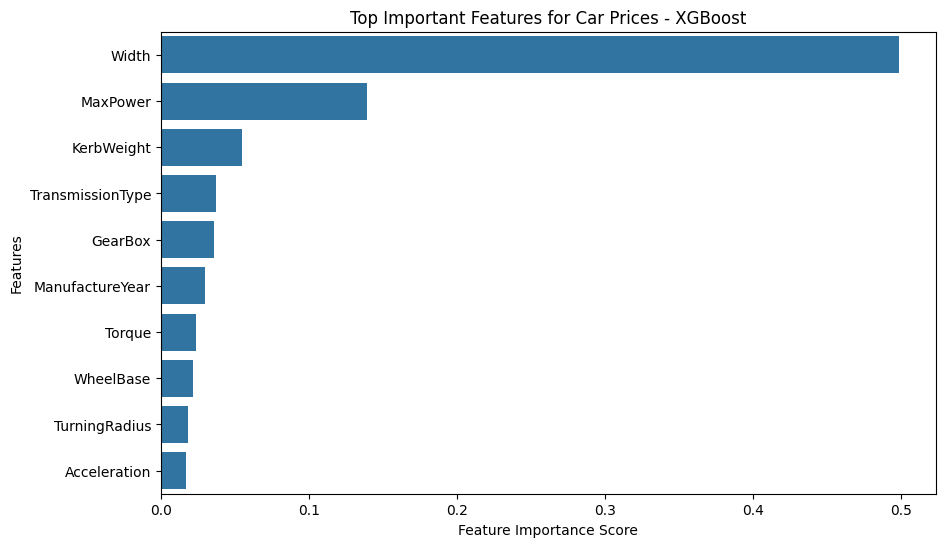

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Handle categorical data with label encoding for simplicity
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split data into features and target variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top Important Features for Car Prices - XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()


#EDA CODE 1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical variables to visualize their distributions
data.hist(bins=30, figsize=(20, 20), layout=(6, 4))
plt.tight_layout()
plt.show()

# Calculate correlation matrix for numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Identify features most correlated with 'Price'
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
price_correlation


**Important features in Categorical Data**

Most Important Categorical Features based on Mutual Information:
CarModel            0.802875
CarLinks            0.797769
EngineType          0.714070
VariantName         0.632390
GearBox             0.419014
manufacturer        0.369964
BodyType            0.286207
RearBrakeType       0.261815
FuelSupplySystem    0.213528
DriveType           0.189250
dtype: float64


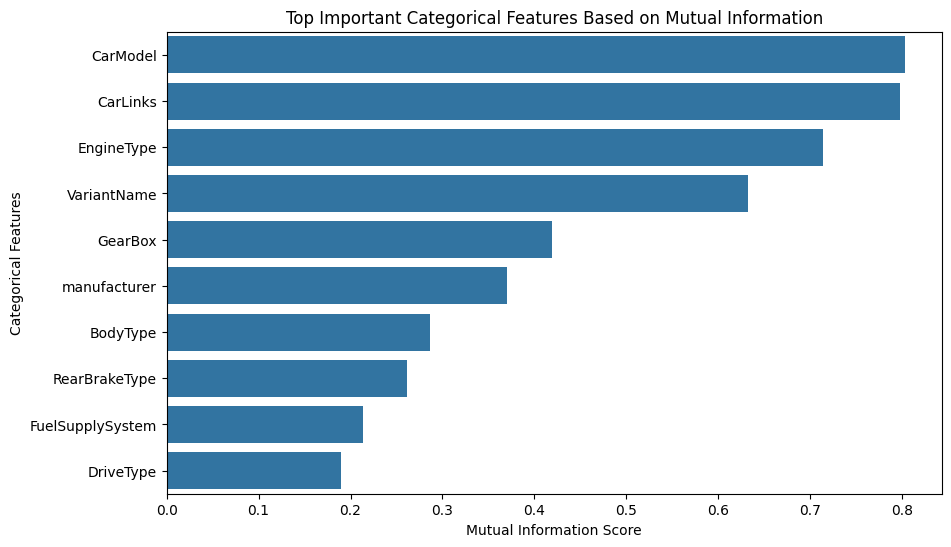

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Step 1: Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Step 2: Calculate Mutual Information for categorical features
mi = mutual_info_regression(X[categorical_cols], y, random_state=42)

# Create a DataFrame to display results
mi_scores = pd.Series(mi, index=categorical_cols).sort_values(ascending=False)

# Step 3: Display the most important categorical features
print("Most Important Categorical Features based on Mutual Information:")
print(mi_scores.head(10))

# Plot the top important categorical features
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.head(10), y=mi_scores.head(10).index)
plt.title('Top Important Categorical Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Categorical Features')
plt.show()


**Important features among Numerical Data**

Mean Absolute Error: 0.9099822268878978
Mean Squared Error: 2.3327291677774364
R^2 Score: 0.899693233439027
Most Important Numerical Features based on RandomForestRegressor:
Width               0.479555
MaxPower            0.185466
ManufactureYear     0.138170
TurningRadius       0.026966
KilometersDriven    0.024829
Length              0.024077
WheelBase           0.022264
VariantId           0.021453
KerbWeight          0.015452
Height              0.012783
dtype: float64


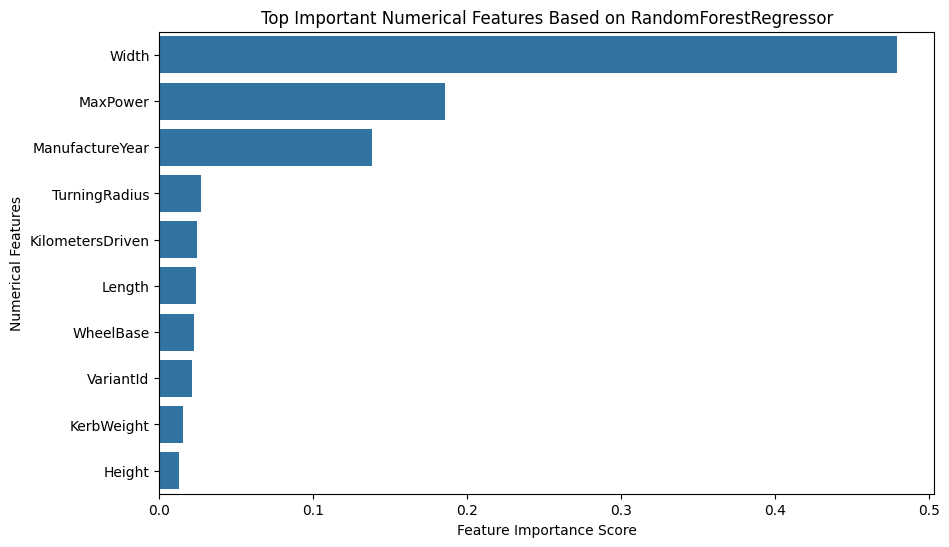

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Step 1: Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('Price')  # Exclude the target variable 'Price'

# Step 2: Split data into features (X) and target variable (y)
X = data[numerical_cols]
y = data['Price']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 6: Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False)

# Step 7: Display the most important numerical features
print("Most Important Numerical Features based on RandomForestRegressor:")
print(top_features.head(10))

# Plot the top important numerical features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(10), y=top_features.head(10).index)
plt.title('Top Important Numerical Features Based on RandomForestRegressor')
plt.xlabel('Feature Importance Score')
plt.ylabel('Numerical Features')
plt.show()


#Encoding Nominal and Ordinal Varriables

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Identify Important Features (Assuming features are identified previously)
# Replace with your identified important features
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']

# Step 1: Encoding Categorical Variables
# Identify nominal and ordinal categorical variables
nominal_cats = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType', 'TransmissionType','Insurance',
                 'DriveType', 'FuelSupplySystem', 'RearBrakeType', 'TyreType','SteeringType', 'HeadLights', 'Locking' ]  # Assuming these are nominal
ordinal_cats = ['GearBox']    # Assuming 'Transmission' is ordinal, adjust based on data understanding


# Encoding Nominal Categorical Variables using One-Hot Encoding
# Encoding Ordinal Categorical Variables using Label Encoding
label_encoders = {col: LabelEncoder() for col in ordinal_cats}
for col in ordinal_cats:
    data[col] = label_encoders[col].fit_transform(data[col])

# One-Hot Encoding for Nominal Variables
data = pd.get_dummies(data, columns=nominal_cats, drop_first=True)

#Normalizing Numerical Data

In [ ]:
# Step 2: Normalizing Numerical Features
# Choose Scaling Technique: MinMaxScaler for models sensitive to feature scales
scaler = MinMaxScaler()
data[important_numerical_cols] = scaler.fit_transform(data[important_numerical_cols])

In [14]:
#standara scalar
scaler = StandardScaler()
data[important_numerical_cols] = scaler.fit_transform(data[important_numerical_cols])


#Test-Train Split

In [15]:
# Step 3: Train-Test Split
X = data[important_numerical_cols + list(data.columns.difference(important_numerical_cols + ['Price']))]
y = data['Price']
print(X.dtypes)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Width                      float64
MaxPower                   float64
ManufactureYear            float64
TurningRadius              float64
KilometersDriven           float64
                            ...   
manufacturer_Skoda            bool
manufacturer_Tata             bool
manufacturer_Toyota           bool
manufacturer_Volkswagen       bool
manufacturer_Volvo            bool
Length: 3357, dtype: object


#Model Selection and Model Training, Model Evaluation

In [17]:
# Step 3: Train-Test Split
X = data[important_numerical_cols + list(data.columns.difference(important_numerical_cols + ['Price']))]
y = data['Price']

# Convert non-numerical columns to numerical using one-hot encoding
X = pd.get_dummies(X)  # Convert categorical features to numerical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Model Selection - Choose models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Step 5: Model Training and Evaluation using Cross-Validation
results = {}
for name, model in models.items():
    # Train the model using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = np.mean(cv_scores)
    print(f"{name}: Mean CV MAE = {-np.mean(cv_scores):.4f}")

# Select the best performing model based on cross-validation
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")


Linear Regression: Mean CV MAE = 0.9084
Decision Tree: Mean CV MAE = 0.9995
Random Forest: Mean CV MAE = 0.7931
Gradient Boosting: Mean CV MAE = 0.9687

Best Model: Decision Tree
Test MAE: 0.9995
Test MSE: 3.6835
Test R^2: 0.8416


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = pd.read_excel('/content/FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors', 'Car_Age', 'TopSpeed',
                            'Mileage_per_Year']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['Price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# # Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
print("Model trained and ready for predictions.")

# Evaluate on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

Model trained and ready for predictions.
Test MAE: 0.7520
Test MSE: 1.7515
Test R^2: 0.9241


#Optimization


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load the Excel file
file_path = '/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx'
df = pd.read_excel(file_path)

# Step 1: Calculate Age of the Car
current_year = datetime.now().year
df['Car_Age'] = current_year - df['ManufactureYear']  # Assuming the column is named 'Year_of_Manufacture'

# Step 2: Calculate Mileage per Year
df['Mileage_per_Year'] = df['Mileage'] / df['Car_Age']  # Assuming the column is named 'Mileage'

# Display the updated dataset with new features
print(df.head())

# Save the updated dataset to a new Excel file with the added feature engineering columns
# df.to_excel('/mnt/data/Cleaned_Cars_Data_With_Added_Features.xlsx', index=False)


        City                                           CarLinks  IgnitionType  \
0  Bangalore  https://www.cardekho.com/used-car-details/used...             0   
1  Bangalore  https://www.cardekho.com/buy-used-car-details/...             0   
2  Bangalore  https://www.cardekho.com/used-car-details/used...             0   
3  Bangalore  https://www.cardekho.com/buy-used-car-details/...             0   
4  Bangalore  https://www.cardekho.com/used-car-details/used...             0   

  FuelType   BodyType  KilometersDriven TransmissionType  PreviousOwners  \
0   Petrol  Hatchback            120000           Manual             3.0   
1   Petrol        SUV             32706           Manual             2.0   
2   Petrol  Hatchback             11949           Manual             1.0   
3   Petrol      Sedan             17794           Manual             1.0   
4   Diesel        SUV             60000           Manual             1.0   

  manufacturer            CarModel  ...          TyreTyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df.to_excel('FeaturesEngineered.xlsx', index=False)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = pd.read_excel('/content/FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors', 'Car_Age', 'TopSpeed',
                            'Mileage_per_Year']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['Price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
import numpy as np
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# # Train the model
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Evaluate the model
# print("Model trained and ready for predictions.")

# Train Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust alpha for tuning
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test)

# Train Ridge model
ridge = Ridge(alpha=1.0)  # You can adjust alpha for tuning
ridge.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Lasso evaluation
lasso_mae, lasso_mse, lasso_r2 = evaluate_model(y_test, y_pred_lasso)
print(f"Lasso: MAE={lasso_mae}, MSE={lasso_mse}, R2={lasso_r2}")

# Ridge evaluation
ridge_mae, ridge_mse, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge: MAE={ridge_mae}, MSE={ridge_mse}, R2={ridge_r2}")


Lasso: MAE=1.457114571732474, MSE=4.614860929698822, R2=0.8001018191406374
Ridge: MAE=0.8591165736335664, MSE=2.071417740447712, R2=0.9102740809694708


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample data
data = pd.read_excel('/content/FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors', 'Car_Age', 'TopSpeed',
                            'Mileage_per_Year']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']

# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['Price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
import numpy as np
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)


# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

# Train models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict on training data
y_train_pred_lasso = lasso.predict(X_train)
y_train_pred_ridge = ridge.predict(X_train)

# Predict on test data
y_test_pred_lasso = lasso.predict(X_test)
y_test_pred_ridge = ridge.predict(X_test)

# Calculate metrics for Lasso
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Calculate metrics for Ridge
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print results
print("Lasso Regression:")
print(f"Training MAE: {mae_train_lasso:.4f}, Test MAE: {mae_test_lasso:.4f}")
print(f"Training MSE: {mse_train_lasso:.4f}, Test MSE: {mse_test_lasso:.4f}")
print(f"Training R²: {r2_train_lasso:.4f}, Test R²: {r2_test_lasso:.4f}")

print("\nRidge Regression:")
print(f"Training MAE: {mae_train_ridge:.4f}, Test MAE: {mae_test_ridge:.4f}")
print(f"Training MSE: {mse_train_ridge:.4f}, Test MSE: {mse_test_ridge:.4f}")
print(f"Training R²: {r2_train_ridge:.4f}, Test R²: {r2_test_ridge:.4f}")

Lasso Regression:
Training MAE: 1.5007, Test MAE: 1.4571
Training MSE: 5.1970, Test MSE: 4.6149
Training R²: 0.7760, Test R²: 0.8001

Ridge Regression:
Training MAE: 0.5849, Test MAE: 0.8591
Training MSE: 0.9140, Test MSE: 2.0714
Training R²: 0.9606, Test R²: 0.9103


Reducing Overfitting

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
import numpy as np

data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/FeaturesEngineered.xlsx')

# Define columns
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors', 'Car_Age', 'TopSpeed',
                            'Mileage_per_Year']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']
# Define X and y
X = data[important_numerical_cols + important_categorical_cols]
y = data['Price']

# Separate numerical and categorical data
X_numerical = X[important_numerical_cols]
X_categorical = X[important_categorical_cols]

# Scale numerical data
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Combine processed numerical and categorical data
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

# Set up Ridge Regression model
ridge = Ridge()

# Define alpha values for Grid Search
param_grid = {
    'alpha': np.logspace(-4, 4, 10)
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and performance
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

# Evaluate the model with the best alpha value
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Cross-validation score
cv_scores = cross_val_score(best_ridge, X_processed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-np.mean(cv_scores)}")

# Feature Engineering: Use Recursive Feature Elimination with Cross-Validation (RFECV)
model = Ridge(alpha=best_alpha)
selector = RFECV(estimator=model, step=1, cv=5)
selector = selector.fit(X_train, y_train)

# Print selected features
print(f"Selected features: {selector.support_}")
print(f"Ranking of features: {selector.ranking_}")

# Evaluate the final model on the test set
y_test_pred = best_ridge.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MAE: {mae_test:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")


Best alpha value: 2.782559402207126
Cross-validated MSE: 2.9058335127111112


KeyboardInterrupt: 

#Rough

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Feature Engineering: Example - Creating polynomial features
# Add new features using domain knowledge or polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors']

# Create interaction and polynomial terms for important numerical features
poly_features = poly.fit_transform(data[important_numerical_cols])
poly_feature_names = poly.get_feature_names_out(important_numerical_cols)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine the new polynomial features with the original data
data = pd.concat([data, poly_df], axis=1)

# Encoding Categorical Variables
nominal_cats = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType', 'TransmissionType','Insurance',
                 'DriveType', 'FuelSupplySystem', 'RearBrakeType', 'TyreType','SteeringType', 'HeadLights', 'Locking','GearBox' ]
# ordinal_cats = ['GearBox']

# # Apply Label Encoding to ordinal variables
# label_encoders = {col: LabelEncoder() for col in ordinal_cats}
# for col in ordinal_cats:
#     data[col] = label_encoders[col].fit_transform(data[col])

# Apply One-Hot Encoding to nominal variables
data = pd.get_dummies(data, columns=nominal_cats, drop_first=True)

# Step: Check Multicollinearity with VIF and remove high VIF features
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

# Calculate VIF and drop features with VIF > 10 (threshold can be adjusted)
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
vif_data = calculate_vif(data, numerical_features)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
data = data.drop(columns=high_vif_features)

# Scaling Numerical Features
scaler = StandardScaler()  # Standard scaling for stability
scaled_numerical_data = scaler.fit_transform(data[numerical_features])
data[numerical_features] = scaled_numerical_data

# Train-Test Split
X = data.drop('Price', axis=1)
y = data['Price']
X= pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Regularization with Ridge (L2) and Lasso (L1)
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)

# Hyperparameter tuning for Ridge and Lasso
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

lasso_param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_absolute_error')
lasso_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit and Evaluate Ridge
ridge_search.fit(X_train, y_train)
ridge_best_model = ridge_search.best_estimator_

# Fit and Evaluate Lasso
lasso_search.fit(X_train, y_train)
lasso_best_model = lasso_search.best_estimator_

# Evaluation on the test set
ridge_pred = ridge_best_model.predict(X_test)
lasso_pred = lasso_best_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Print Ridge results
print(f"\nRidge Regression - Best Params: {ridge_search.best_params_}")
print(f"Ridge Test MAE: {ridge_mae:.4f}")
print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Ridge Test R^2: {ridge_r2:.4f}")

# Print Lasso results
print(f"\nLasso Regression - Best Params: {lasso_search.best_params_}")
print(f"Lasso Test MAE: {lasso_mae:.4f}")
print(f"Lasso Test MSE: {lasso_mse:.4f}")
print(f"Lasso Test R^2: {lasso_r2:.4f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide 

KeyError: "['KilometersDriven', 'PreviousOwners', 'ManufactureYear', 'VariantId', 'Price', 'Engine', 'Seats', 'Mileage', 'Torque', 'MaxPower', 'FrontTread', 'RearTread', 'KerbWeight', 'Height', 'Length', 'Width', 'WheelBase', 'TopSpeed', 'Doors', 'CargoVolume', 'Acceleration', 'TurningRadius', 'Width^2', 'Width MaxPower', 'Width ManufactureYear', 'Width TurningRadius', 'Width KilometersDriven', 'Width Length', 'Width WheelBase', 'Width KerbWeight', 'Width Torque', 'Width Engine', 'Width Height', 'Width Acceleration', 'Width Mileage', 'Width CargoVolume', 'Width PreviousOwners', 'Width Seats', 'Width Doors', 'MaxPower^2', 'MaxPower ManufactureYear', 'MaxPower TurningRadius', 'MaxPower KilometersDriven', 'MaxPower Length', 'MaxPower WheelBase', 'MaxPower KerbWeight', 'MaxPower Torque', 'MaxPower Engine', 'MaxPower Height', 'MaxPower Acceleration', 'MaxPower Mileage', 'MaxPower CargoVolume', 'MaxPower Doors', 'ManufactureYear^2', 'ManufactureYear TurningRadius', 'ManufactureYear KilometersDriven', 'ManufactureYear Length', 'ManufactureYear WheelBase', 'ManufactureYear KerbWeight', 'ManufactureYear Torque', 'ManufactureYear Engine', 'ManufactureYear Height', 'ManufactureYear Acceleration', 'ManufactureYear Mileage', 'ManufactureYear CargoVolume', 'ManufactureYear PreviousOwners', 'ManufactureYear Seats', 'ManufactureYear Doors', 'TurningRadius^2', 'TurningRadius KilometersDriven', 'TurningRadius Length', 'TurningRadius WheelBase', 'TurningRadius KerbWeight', 'TurningRadius Torque', 'TurningRadius Engine', 'TurningRadius Height', 'TurningRadius Acceleration', 'TurningRadius Mileage', 'TurningRadius CargoVolume', 'TurningRadius PreviousOwners', 'TurningRadius Seats', 'TurningRadius Doors', 'KilometersDriven^2', 'KilometersDriven Length', 'KilometersDriven WheelBase', 'KilometersDriven KerbWeight', 'KilometersDriven Torque', 'KilometersDriven Engine', 'KilometersDriven Height', 'KilometersDriven Acceleration', 'KilometersDriven Mileage', 'KilometersDriven CargoVolume', 'KilometersDriven PreviousOwners', 'KilometersDriven Seats', 'KilometersDriven Doors', 'Length^2', 'Length WheelBase', 'Length KerbWeight', 'Length Torque', 'Length Engine', 'Length Height', 'Length Acceleration', 'Length Mileage', 'Length CargoVolume', 'Length PreviousOwners', 'Length Seats', 'Length Doors', 'WheelBase^2', 'WheelBase KerbWeight', 'WheelBase Torque', 'WheelBase Engine', 'WheelBase Height', 'WheelBase Acceleration', 'WheelBase Mileage', 'WheelBase CargoVolume', 'WheelBase PreviousOwners', 'WheelBase Seats', 'WheelBase Doors', 'KerbWeight^2', 'KerbWeight Torque', 'KerbWeight Engine', 'KerbWeight Height', 'KerbWeight Acceleration', 'KerbWeight Mileage', 'KerbWeight CargoVolume', 'KerbWeight PreviousOwners', 'KerbWeight Seats', 'KerbWeight Doors', 'Torque^2', 'Torque Engine', 'Torque Height', 'Torque Acceleration', 'Torque Mileage', 'Torque CargoVolume', 'Torque PreviousOwners', 'Torque Seats', 'Torque Doors', 'Engine^2', 'Engine Height', 'Engine Acceleration', 'Engine Mileage', 'Engine CargoVolume', 'Engine PreviousOwners', 'Engine Seats', 'Engine Doors', 'Height^2', 'Height Acceleration', 'Height Mileage', 'Height CargoVolume', 'Height PreviousOwners', 'Height Seats', 'Height Doors', 'Acceleration^2', 'Acceleration Mileage', 'Acceleration CargoVolume', 'Acceleration PreviousOwners', 'Acceleration Seats', 'Acceleration Doors', 'Mileage^2', 'Mileage CargoVolume', 'Mileage PreviousOwners', 'Mileage Seats', 'Mileage Doors', 'CargoVolume^2', 'CargoVolume PreviousOwners', 'CargoVolume Seats', 'CargoVolume Doors', 'PreviousOwners^2', 'PreviousOwners Seats', 'PreviousOwners Doors', 'Seats^2', 'Seats Doors', 'Doors^2'] not in index"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load your data
data = pd.read_excel('/content/drive/MyDrive/CarDekho/Colab/Cleaned_Cars_Data_Capped_Outliers.xlsx')

# Define important features (replace with the actual important features)
important_numerical_cols = ['Width', 'MaxPower', 'ManufactureYear','TurningRadius','KilometersDriven','Length','WheelBase','KerbWeight','Torque',
                            'Engine','Height','Acceleration', 'Mileage', 'CargoVolume','PreviousOwners', 'Seats', 'Doors']  # Example
important_categorical_cols = ['City','FuelType', 'BodyType', 'manufacturer','CarModel', 'VariantName','Color', 'EngineType','TransmissionType',
                              'DriveType', 'FuelSupplySystem','RearBrakeType','TyreType', 'SteeringType', 'HeadLights', 'Locking',
                              'GearBox','Insurance']

# Split data into features (X) and target variable (y)
X = data[important_numerical_cols + important_categorical_cols]
y = data['Price']

# Preprocessing for numerical and categorical features
numerical_transformer = MinMaxScaler()  # Scaling numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # One-hot encoding categorical features

# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, important_numerical_cols),
        ('cat', categorical_transformer, important_categorical_cols)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', DecisionTreeRegressor(random_state=42))]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestRegressor(random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', GradientBoostingRegressor(random_state=42))])
}

# Evaluate models using cross-validation
results = {}
for name, model_pipeline in models.items():
    # Train the model using cross-validation
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = np.mean(cv_scores)
    print(f"{name}: Mean CV MAE = {-np.mean(cv_scores):.4f}")

# Correctly select the best performing model based on cross-validation
best_model_name = min(results, key=results.get)
best_model_pipeline = models[best_model_name]

# Display the selected best model
print(f"\nSelected Best Model: {best_model_name}")

# Step 5: Hyperparameter Tuning (Example for Random Forest, adjust if another model is best)
if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
elif best_model_name == 'Decision Tree':
    param_grid = {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
else:  # Linear Regression doesn't have many hyperparameters to tune
    param_grid = {}

# Only perform GridSearch if there are parameters to tune
if param_grid:
    grid_search = GridSearchCV(best_model_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train, y_train)
    best_model_pipeline = grid_search.best_estimator_

    # Best hyperparameters from Grid Search
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)
else:
    best_model_pipeline.fit(X_train, y_train)  # Fit the model without tuning

# Evaluate the final model on the test set
y_pred = best_model_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Model Performance ({best_model_name} with Best Params):")
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")


**Encoding and normalizing 1**



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Load the dataset
file_path = '/content/drive/MyDrive/CarDekho/Filled_Cars_Data.xlsx'
data = pd.read_excel(file_path)

# Example: Identify nominal and ordinal categorical columns
# Replace these lists with the actual column names in your dataset
nominal_cols = ['City','FuelType', 'BodyType', 'TransmissionType','manufacturer','CarModel', 'VariantName', 'Insurance', 'Color', 'EngineType',
                'FuelSupplySystem','FrontBrakeType','RearBrakeType','SteeringType', 'DriveType', 'TyreType', 'AC', 'HeadLights',
                'Locking','Entertainment']

ordinal_cols = ['IgnitionType','PreviousOwners', 'Seats', 'Doors', 'GearBox']

# One-Hot Encoding for nominal categorical variables
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Label Encoding or Ordinal Encoding for ordinal categorical variables
label_encoders = {}
for col in ordinal_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Display the first few rows of the transformed dataset
print(data.head())

# Save the encoded dataset
data.to_excel('Encoded_Cars_Data.xlsx', index=False)


                                            CarLinks  IgnitionType  \
0  https://www.cardekho.com/used-car-details/used...             0   
1  https://www.cardekho.com/buy-used-car-details/...             0   
2  https://www.cardekho.com/used-car-details/used...             0   
3  https://www.cardekho.com/buy-used-car-details/...             0   
4  https://www.cardekho.com/used-car-details/used...             0   

   KilometersDriven  PreviousOwners  ManufactureYear  VariantId  Price  \
0            120000               3             2015       3979   4.00   
1             32706               2             2018       6087   8.11   
2             11949               1             2018       2983   5.85   
3             17794               1             2014       1867   4.62   
4             60000               1             2015       4277   7.90   

   Engine  Seats  Mileage  ...  Entertainment_Cassette Player  \
0   998.0      2    23.10  ...                          False   
1  1

KeyboardInterrupt: 

In [ ]:
import numpy as np

# IQR method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Z-Score method (alternative)
# from scipy.stats import zscore
# data = data[(np.abs(zscore(data[numerical_cols])) < 3).all(axis=1)]


In [ ]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)


       IgnitionType  KilometersDriven  PreviousOwners  ManufactureYear  \
count         667.0        667.000000      667.000000       667.000000   
mean            0.0          0.006431        0.227586         0.918883   
std             0.0          0.005017        0.079530         0.071863   
min             0.0          0.000143        0.000000         0.578947   
25%             0.0          0.002594        0.200000         0.894737   
50%             0.0          0.005091        0.200000         0.947368   
75%             0.0          0.008929        0.200000         0.973684   
max             0.0          0.027273        0.600000         1.000000   

        VariantId       Price      Engine    Seats     Mileage      Torque  \
count  667.000000  667.000000  667.000000  667.000  667.000000  667.000000   
mean     0.670358    0.080974    0.248474    0.375    0.089854    0.174333   
std      0.150884    0.033596    0.041587    0.000    0.019484    0.054361   
min      0.066528    